# Income Classification using Machine Learning 
The aim of this project is to predict whether the income of an individual is greater than or equal to 50K annually or not, using various machine learning algorithms such as Logistic Regression, Random Forests ect. The notebook is divided into various subsections, each signifying an important stage of the project. 

## Table of Contents
Below is a `Table of Contents` for notebook. Click on the below hyperlinks to jump directly to that particular section
* <a href="#1.-Importing-Libraries">Required Libraries</a>
* <a href="#2.-Exploratory-Data-Analysis">Exploratory Data Analysis</a>
* <a href="#3.-Missing-Value-Treatment-using-DataWig">Missing Value Treatment</a>
* <a href="#4.-Feature-Encoding">Feature Encoding</a>
* <a href="#5.-Feature-Transformation">Feature Transformation</a>
* <a href="#6.-Feature-Selection-and-Elimination">Feature Selection and Elimination</a>
* <a href="#7.-Data-Modelling">Data Modelling</a>
* <a href="#8.-Model-Evaluation">Model Evaluation</a>
* <a href="#9.-Hyperparameter-Tuning">Hyperparameter Tuning</a>
* <a href="#10.-Saving-Models">Saving Models</a>
* <a href="#11.-Conclusion">Conclusion</a>

## 1. Importing Libraries 

In [1]:
# Importing Basic Libraries for Importing and Reading Data 
import pandas as pd 
import numpy as np 
# Libraries for Visualizations and Exploratory Data Analysis 
import seaborn as sn 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as ss
from scipy.stats import kurtosis,skew
from scipy.stats import chi2_contingency
# Missing Value Treatment
import datawig
from datawig.utils import random_split
from datawig import SimpleImputer
# Feature Encoding 
import category_encoders as ce
# Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Feature Selection
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_recall_curve
from sklearn.metrics import log_loss
# Hyperparameter Tuning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Saving models 
import pickle
import warnings
from pandas.core.common import SettingWithCopyWarning

In [2]:
pd.set_option("display.max_columns",16)
warnings.filterwarnings(action="ignore",category=SettingWithCopyWarning)

<a href="#Table-of-Contents">Back To Top</a>

# 2. Exploratory Data Analysis
Exploratory Data Analysis is an approach in analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

The `Aim` of this subsection is to gather insight about our dataset, evaluate the relationship of the independant variables with our target variable and visualize these relationships.

#### 2.1 Reading Data 

In [3]:
# Import the data 
income=pd.read_csv(r"C:\Users\Sidhant Mathur\Desktop\Projects\Income_Data\income_data_env\Data\adult_sal.csv")
income.head()

,Unnamed: 0,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### 2.2  Knowing more about our data

In [4]:
# concise summary of our data
income.info()
# Data primarily contains object and int64 type features only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
Unnamed: 0       32561 non-null int64
age              32561 non-null int64
type_employer    32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
education_num    32561 non-null int64
marital          32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capital_gain     32561 non-null int64
capital_loss     32561 non-null int64
hr_per_week      32561 non-null int64
country          32561 non-null object
income           32561 non-null object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [5]:
# gathering more info about the data
income.describe()

,Unnamed: 0,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8141.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16281.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24421.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# checking for nan values
income.isnull().sum()

Unnamed: 0       0
age              0
type_employer    0
fnlwgt           0
education        0
education_num    0
marital          0
occupation       0
relationship     0
race             0
sex              0
capital_gain     0
capital_loss     0
hr_per_week      0
country          0
income           0
dtype: int64

In [7]:
print(f"Dataset contains {income.shape[0]} rows and {income.shape[1]} columns")

Dataset contains 32561 rows and 16 columns


#### 2.2.1 Feature Analysis

<=50K    24720
>50K      7841
Name: income, dtype: int64



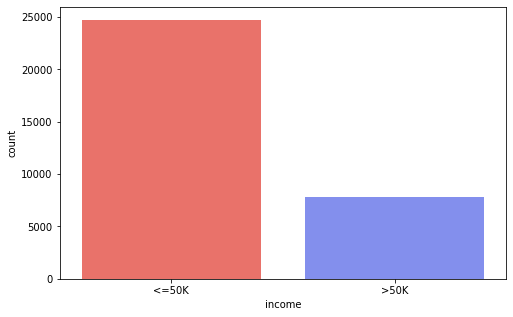

In [8]:
# checking target variable: income (categorical)
print(income["income"].value_counts())
print()
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax = sn.countplot(x = "income",data=income,palette=["#fe5f55","#7181ff"]);

From the above cell, we can see that the number of entries whose income stands "<=50k" is much higher than ">50k". This indicates a class imbalance in our data, which will be taken into account when we proceed towards creating machine learning models.

In [9]:
# Exploring age (continuous)
income["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

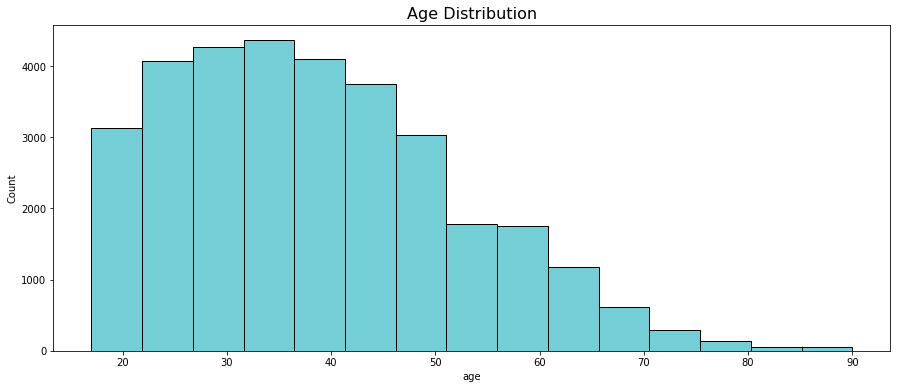

In [10]:
# distribution of age
fig,ax=plt.subplots(1,1,figsize=(15,6))
plt.title("Age Distribution",fontsize=16);
sn.histplot(income["age"],bins=15,color="#44bec7");

From the graph, we can observe that data is right skewed and that age of maximum people lies between 30-45 years old, with the median value being just under 40 years old.

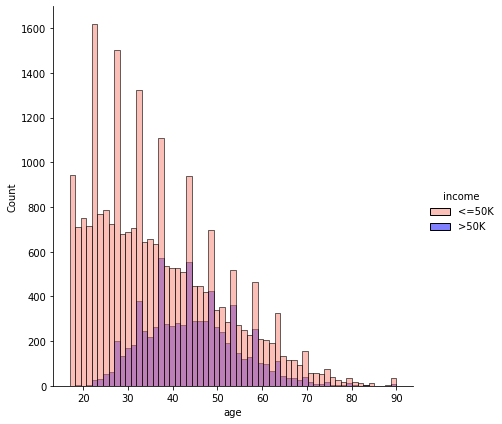

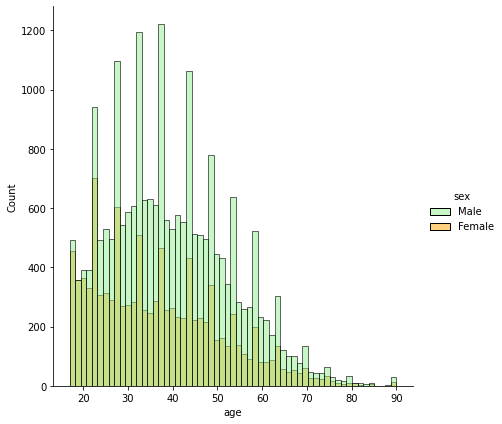

In [11]:
# age distribution in target classes
sn.displot(data=income,x="age",hue="income",height=6,palette=["salmon","blue"]);
sn.displot(data=income,x="age",hue="sex",height=6,palette=["lightgreen","orange"]);

From graph 1:
* The ratio of people having an income "<=50k" to ">50k" gradually decreases as we progress towards the mean, after which the ratio increases again. This means that people in lower age groups (17-35) are more likely to have incomes less than 50k than more. 
* Similarly, people belonging to the age groups (35-60) are more likely to have incomes higher than 50k.

From graph 2:
* Most people in our dataset are males. 

Male      21790
Female    10771
Name: sex, dtype: int64


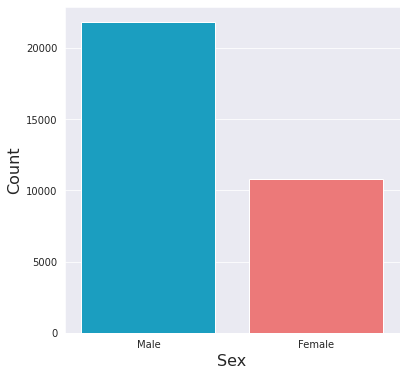

In [12]:
# sex (categorical)
print(income["sex"].value_counts())
with sn.axes_style("darkgrid"):
    plt.figure(figsize=(6,6))
    sn.countplot(x=income["sex"],palette=["#00aedb","#ff6666"]);
    plt.xlabel("Sex",fontsize=16);
    plt.ylabel("Count",fontsize=16);

This aligns with graph 2 of the previous cell, wherin we mentioned that most people were males, this graph reassures that our observation was correct.

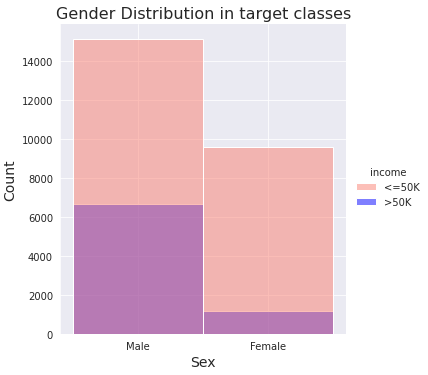

In [13]:
# gender distribution in target classes
with sn.axes_style("darkgrid"):
    sn.displot(data=income,x="sex",hue="income",height=5,palette=["salmon","blue"]);
    plt.title("Gender Distribution in target classes",fontsize=16)
    plt.xlabel("Sex",fontsize=14)
    plt.ylabel("Count",fontsize=14)

Males are more likely to have an income ">=50k" than females, this could be due to our data not containing enough number of instances to say otherwise.

Next we look at the type of employers in our data

In [14]:
# type_employer (categorical) contains "?"
income["type_employer"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

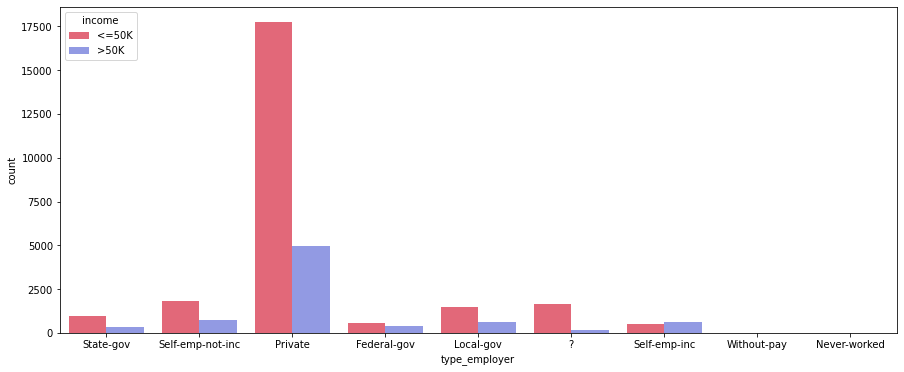

In [15]:
fig,ax1 = plt.subplots(figsize=(15,6))
sn.countplot(x=income["type_employer"],hue=income["income"],ax=ax1,palette=["#f6546a","#8490f0"]);

* From this comparitive bar plot, most of the people are employed in the private sector. 
* The chance of a randomly selected individual to be employed in the private sector is 0.7. In mathematical terms, P(Person|type_employer="Private")=0.7

In [16]:
# Checking fnlwgt (continuous)
income["fnlwgt"].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

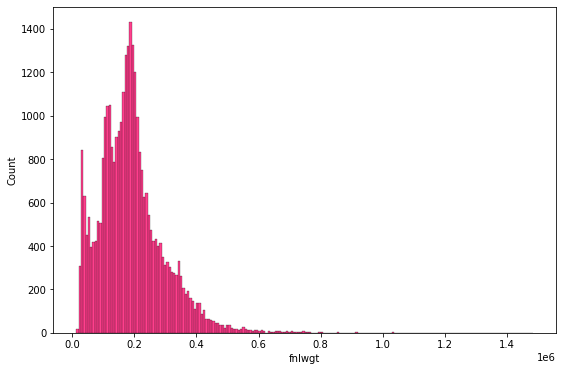

In [17]:
# fnlwgt distribution
fig,(ax) = plt.subplots(1,1,figsize=(9,6))
sn.histplot(x ="fnlwgt",data=income,ax=ax,color=["#ff0067"]);

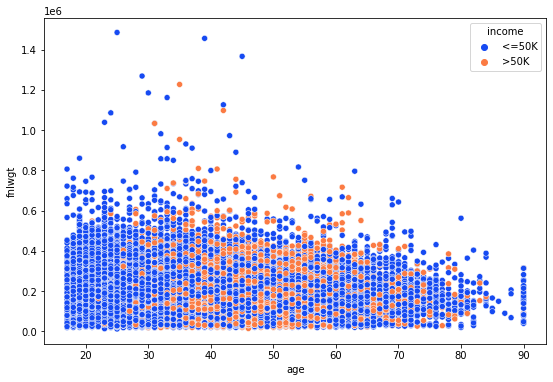

In [18]:
fig,(ax) = plt.subplots(1,1,figsize=(9,6))
sn.scatterplot(x="age",y="fnlwgt",data=income,hue="income",palette=["#164af2","#fb7b43"]);

In [19]:
# education (categorical)
income["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

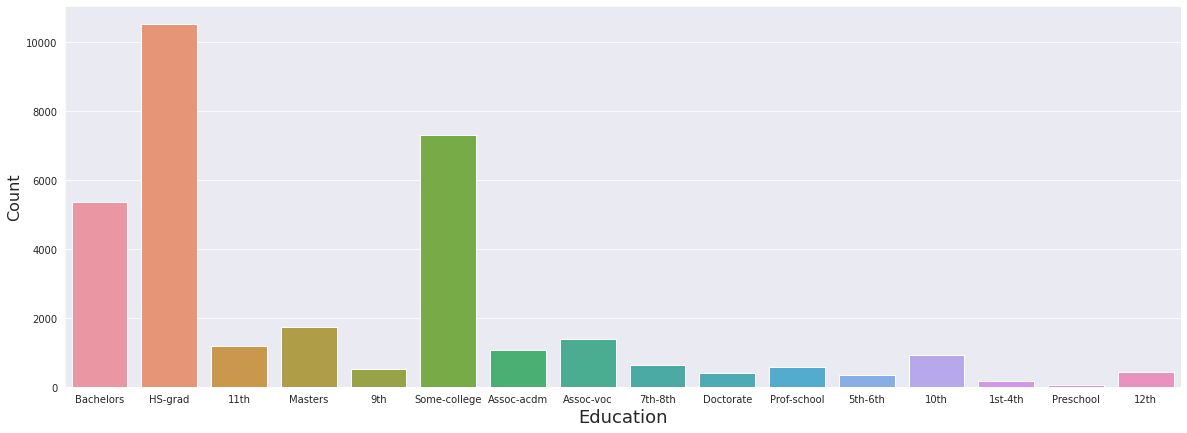

In [20]:
with sn.axes_style("darkgrid"):
    fig,ax=plt.subplots(figsize=(20,7))
    sn.countplot(x = income["education"],ax=ax);
    plt.xlabel("Education", fontsize=18)
    plt.ylabel("Count", fontsize=16)

* Since the concentration of younger aged people is high, it makes sense for to have high numbers for HS-grad and Bachelors since many individuals arent old enough to finish grad school or even get degrees.

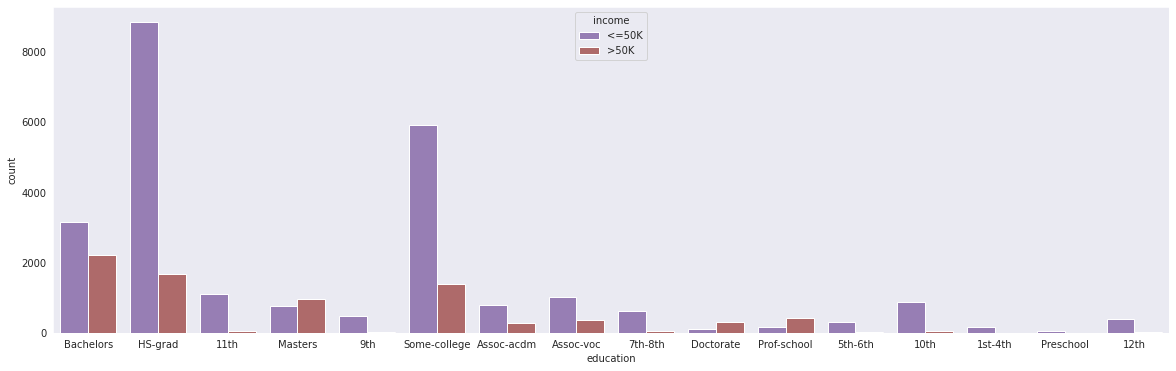

In [21]:
with sn.axes_style("dark"):
    fig,ax1 = plt.subplots(figsize=(20,6))
    sn.countplot(x=income["education"],hue=income["income"],ax=ax1,palette=["#9240f2","#fe1a1c"],saturation=0.3);

* People who have a masters degree level of education or above are more likely to have an income exceeding 50k.

In [22]:
# education_num (discrete)
income["education_num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [23]:
# education_num and education signify the same entity. One of these will be removed in upcoming sections 
edu_list = list(zip(income["education"].unique(),income["education_num"].unique()))
edu_list = sorted(edu_list, key= lambda x:x[1])
edu_list

[('Preschool', 1),
 ('1st-4th', 2),
 ('5th-6th', 3),
 ('7th-8th', 4),
 ('9th', 5),
 ('10th', 6),
 ('11th', 7),
 ('12th', 8),
 ('HS-grad', 9),
 ('Some-college', 10),
 ('Assoc-voc', 11),
 ('Assoc-acdm', 12),
 ('Bachelors', 13),
 ('Masters', 14),
 ('Prof-school', 15),
 ('Doctorate', 16)]

In [24]:
# marital status of the population (categorical)
income["marital"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital, dtype: int64

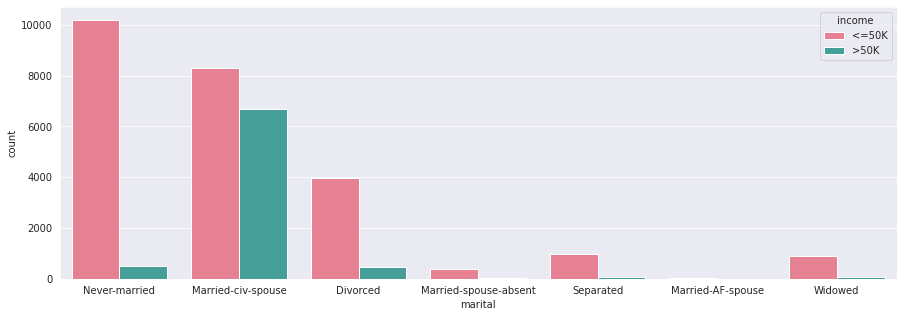

In [25]:
with sn.axes_style("darkgrid"):
    fig,ax=plt.subplots(figsize=(15,5))
    sn.countplot(x="marital",data=income,hue="income",ax=ax,palette="husl");

* An individual making more than 50K is more likely to be married than single

In [26]:
# enlisted occupations (categorical) contains "?"
income["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

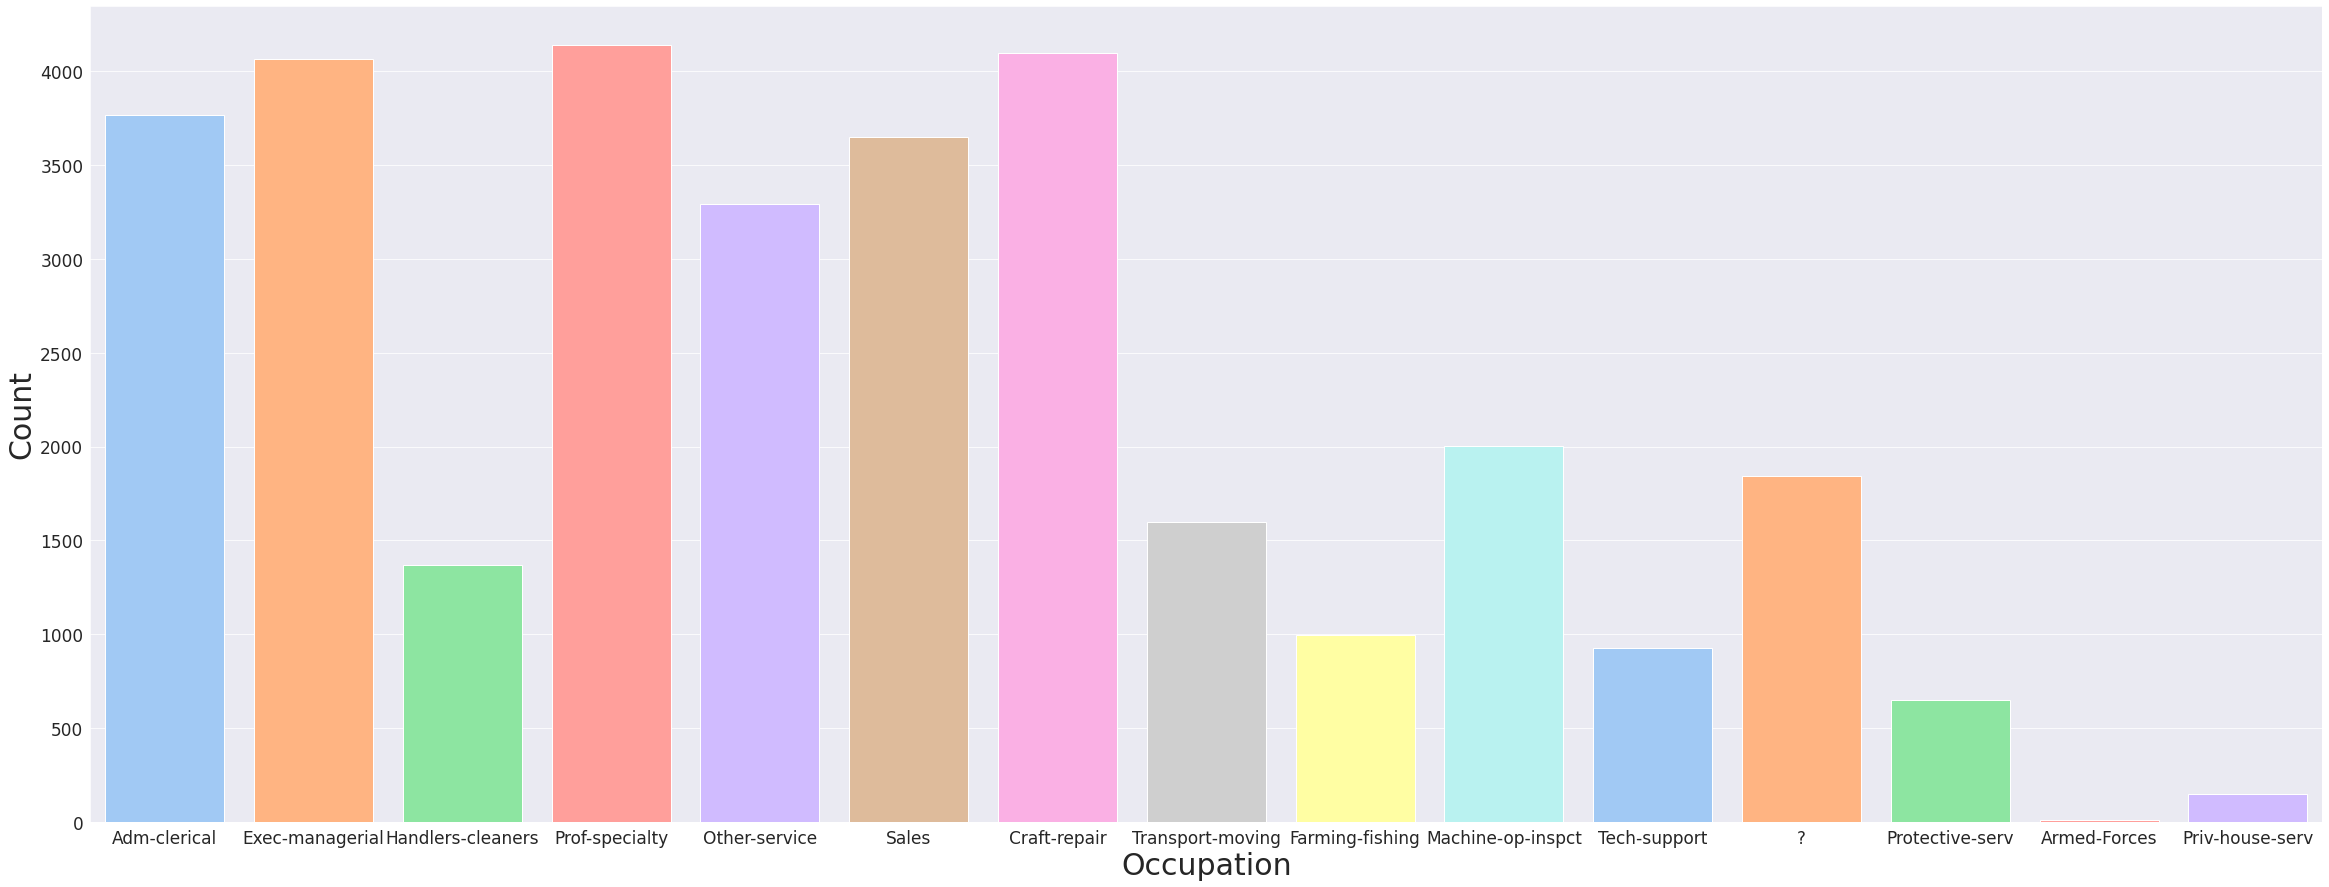

In [27]:
plt.rcParams.update({'font.size': 17})
with sn.axes_style("darkgrid"):
    plt.figure(figsize=(40,15))
    sn.countplot(x = income["occupation"],palette="pastel",saturation=1.0);
    plt.xlabel("Occupation", fontsize=30);
    plt.ylabel("Count", fontsize=30);
plt.rcParams.update({'font.size': 10})

In [28]:
occ_inc=pd.DataFrame(pd.crosstab(income["occupation"],income["income"]))
occ_inc["Probability"] = (occ_inc[">50K"]/(occ_inc[">50K"]+occ_inc["<=50K"]))*100
occ_inc.sort_values(by='Probability',ascending=False)

income,<=50K,>50K,Probability
occupation,,,
Exec-managerial,2098,1968,48.401377
Prof-specialty,2281,1859,44.903382
Protective-serv,438,211,32.511556
Tech-support,645,283,30.495690
Sales,2667,983,26.931507
Craft-repair,3170,929,22.664064
Transport-moving,1277,320,20.037570
Adm-clerical,3263,507,13.448276
Machine-op-inspct,1752,250,12.487512


The above table shows the probability of an individual belonging to an occupation,having an income >50K.
For example, there is a 48% chance that a randomly selected individual whose occupation is Exec-managerial, has an income >50K.

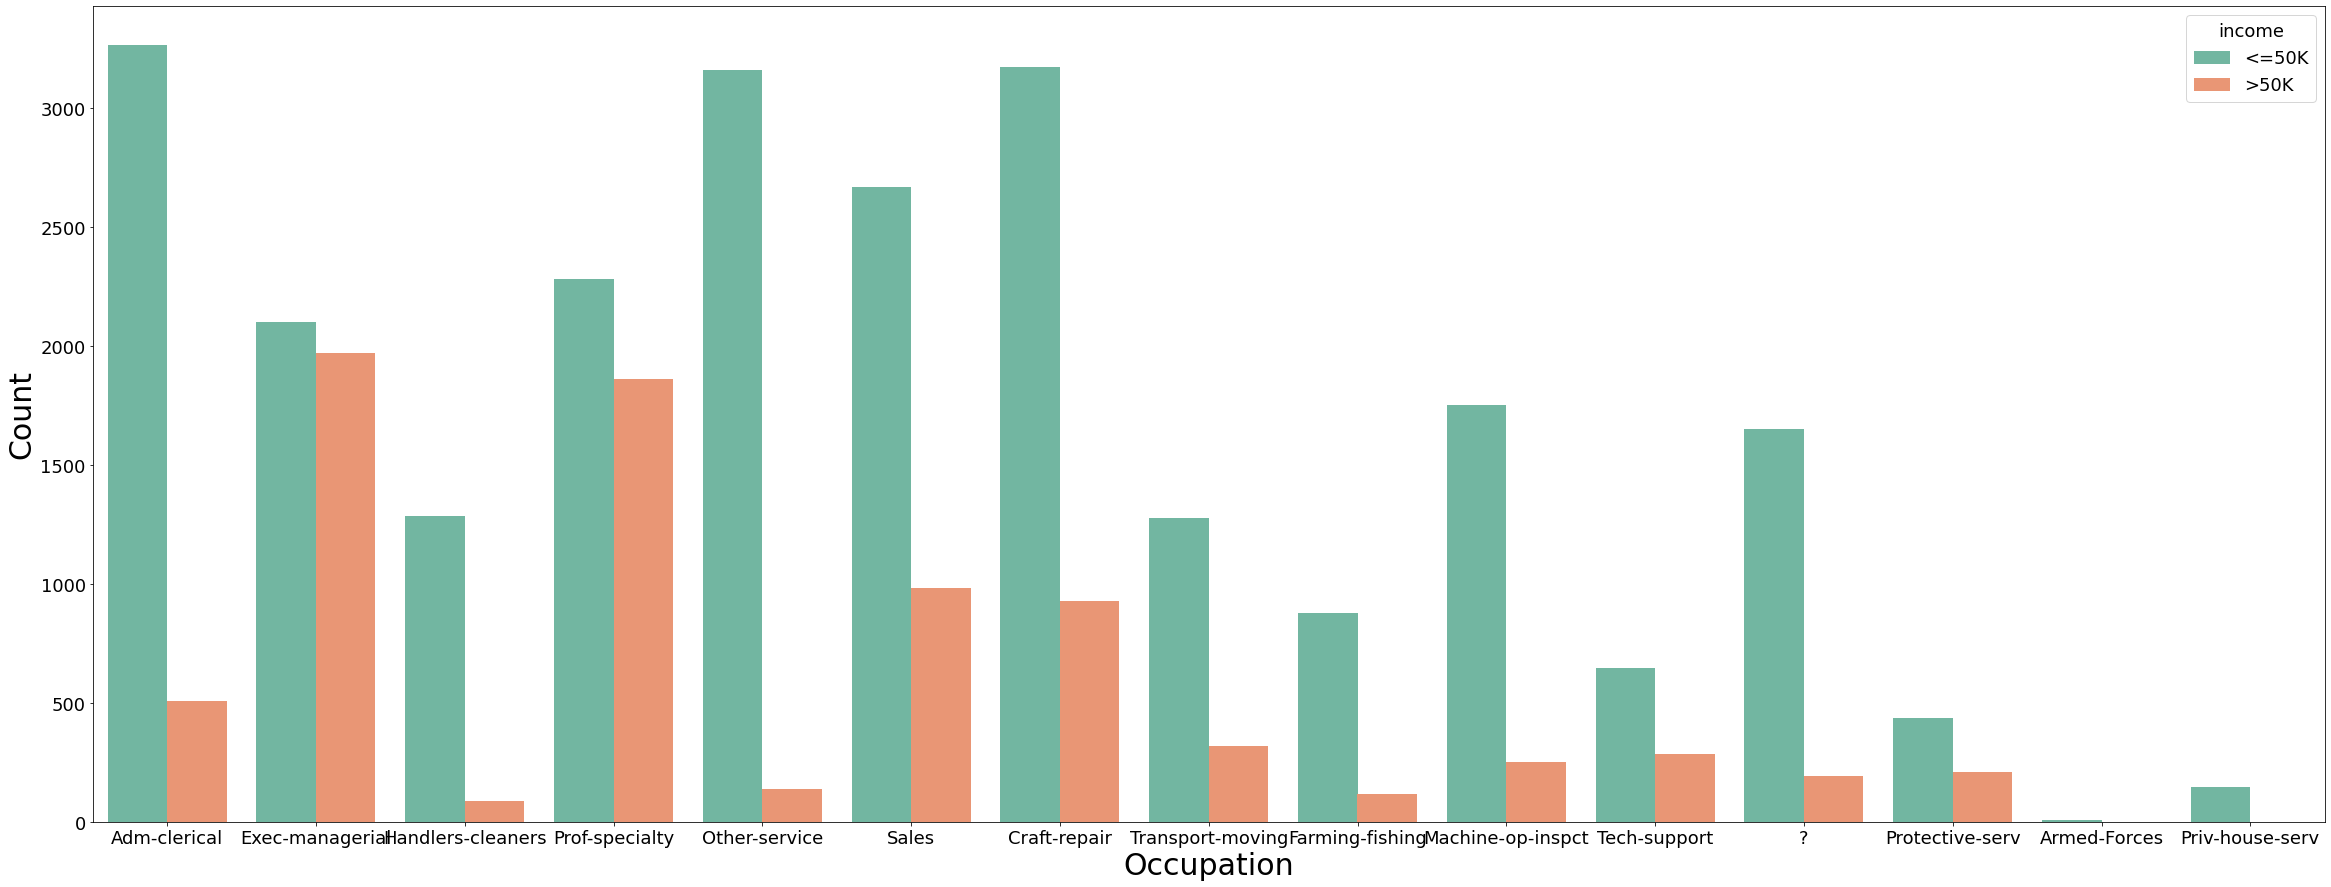

In [29]:
plt.rcParams.update({'font.size': 18})
fig,ax=plt.subplots(1,1,figsize=(40,15))
ax=sn.countplot(x= "occupation",hue="income",data=income,palette="Set2")
plt.xlabel("Occupation",fontsize=30)
plt.ylabel("Count",fontsize=30)
plt.rcParams.update({'font.size': 10})

* Majority of people having an income>50k work in Exec-Managerial,Prof-speciality, Sales roles or Craft-repair roles. 
* These people make up for more than 73% of the population whose income is grater than 50k.

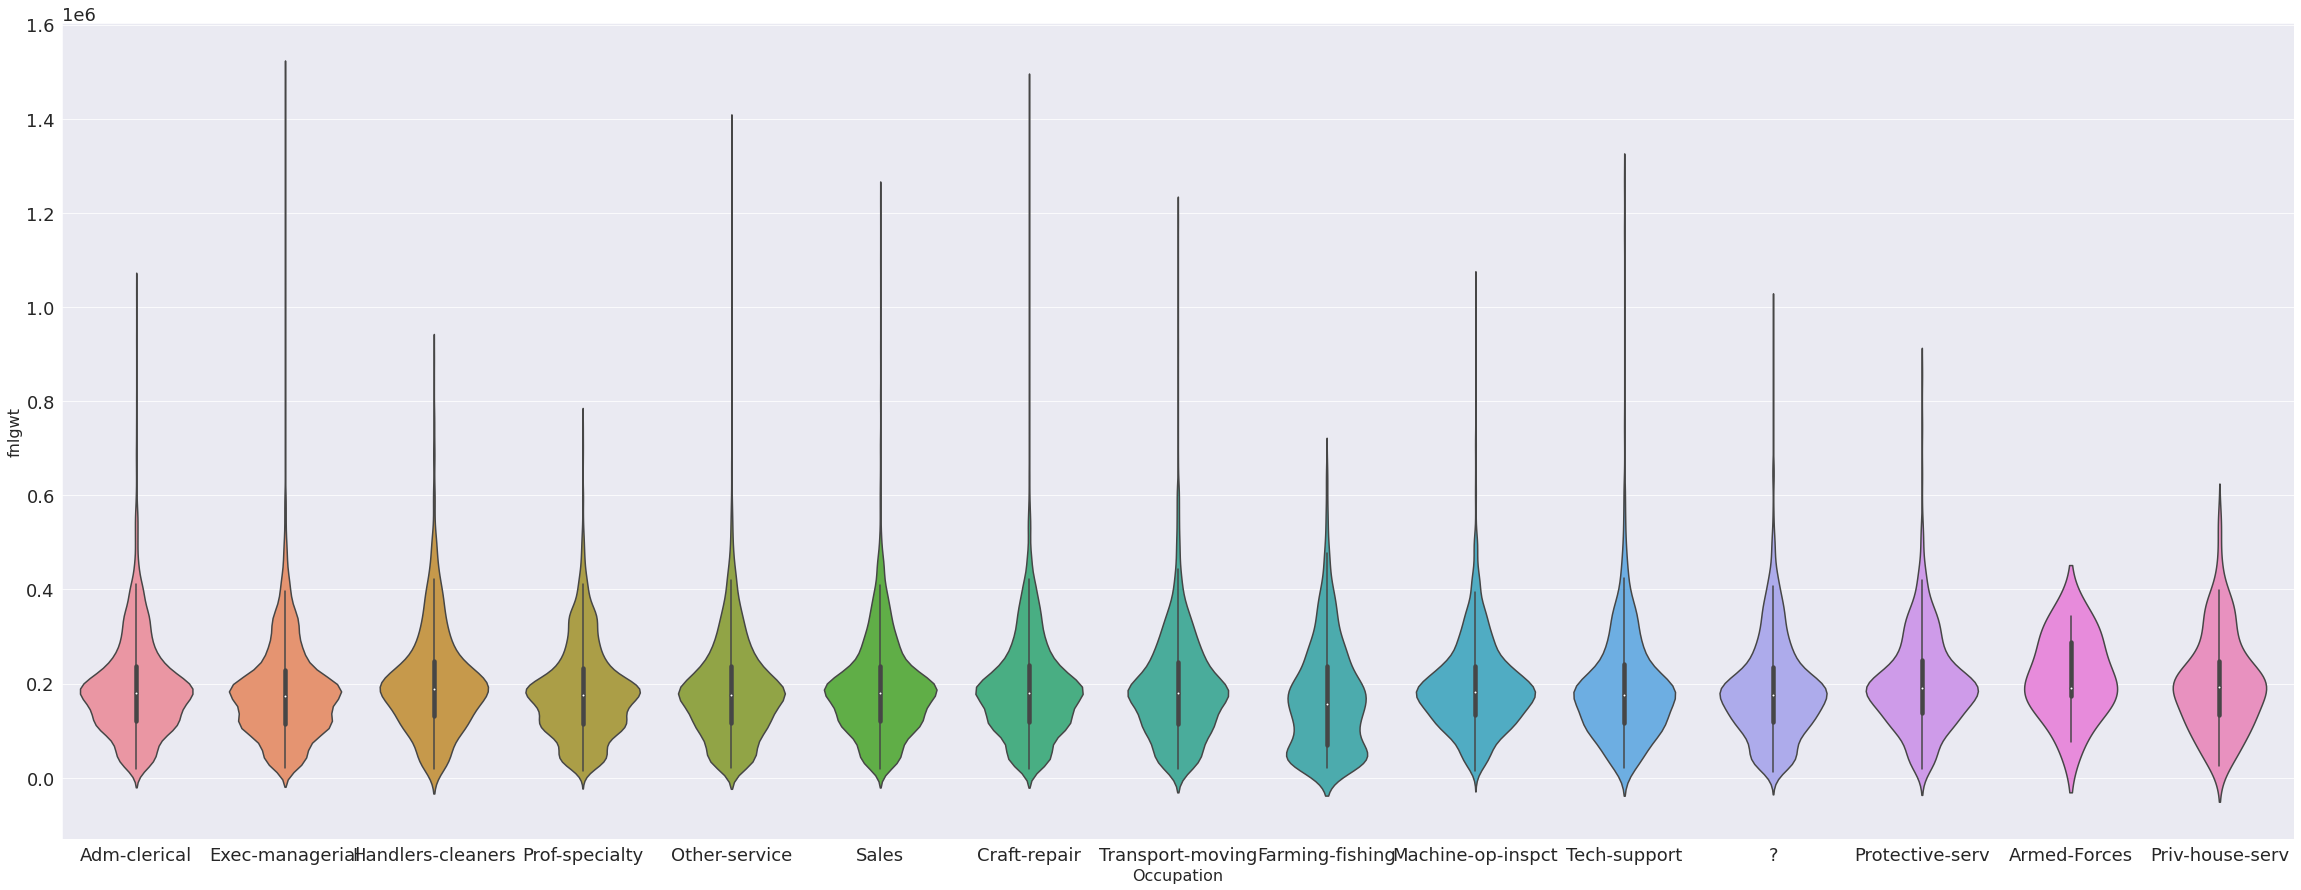

In [30]:
with sn.axes_style("darkgrid"):
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(40,15))
    sn.violinplot(x=income["occupation"],y=income["fnlwgt"]);
    plt.xlabel("Occupation",fontsize=16)
    plt.ylabel("fnlgwt",fontsize=16)
    plt.rcParams.update({'font.size': 10})

In [31]:
# relationship (categorical)
income["relationship"].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

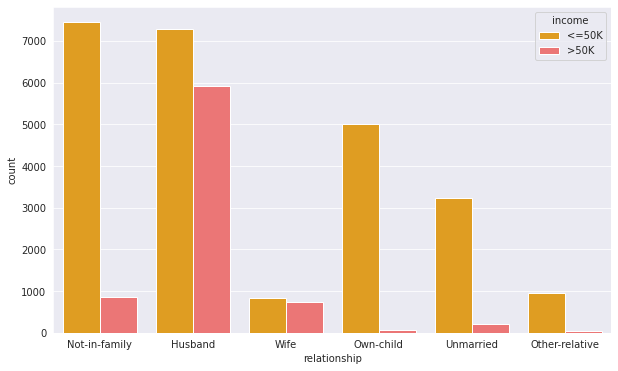

In [32]:
with sn.axes_style("darkgrid"):
    fig,ax=plt.subplots(figsize=(10,6))
    sn.countplot(x="relationship",data=income,hue="income",ax=ax,palette=["#ffa602","#ff6362"]);

In [33]:
income["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

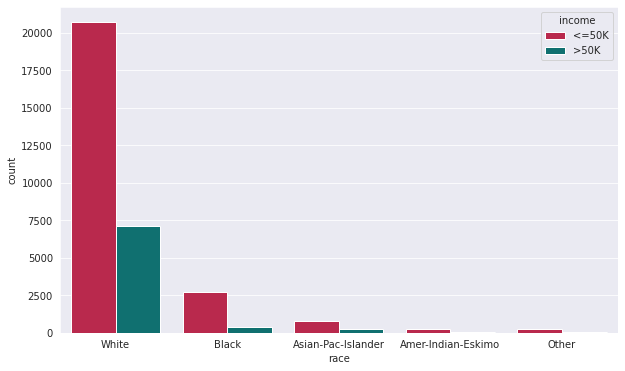

In [34]:
with sn.axes_style("darkgrid"):
    fig,ax=plt.subplots(1,1,figsize=(10,6))
    sn.countplot(x=income["race"],hue=income["income"],ax=ax,palette=["#d11141","#008080"]);

"White" ethnicity has the largest number of people, earning less than 50K a year.Ratio wise, "White" and "Asian-Pac-Islander" have nearly 33% of their population earning higher than 50k. Mathematically, P(income>50K,race=White or :Asian)=0.33

In [35]:
# hr_per_week (continuous)
print("Minimum hours: {}".format(income["hr_per_week"].min()))
print("Maximum hours: {}".format(income["hr_per_week"].max()))
(income["hr_per_week"].unique())

Minimum hours: 1
Maximum hours: 99


array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [36]:
# Countries with highest populations in our dataset
dict(income['country'].value_counts()[:10])

{'United-States': 29170,
 'Mexico': 643,
 '?': 583,
 'Philippines': 198,
 'Germany': 137,
 'Canada': 121,
 'Puerto-Rico': 114,
 'El-Salvador': 106,
 'India': 100,
 'Cuba': 95}

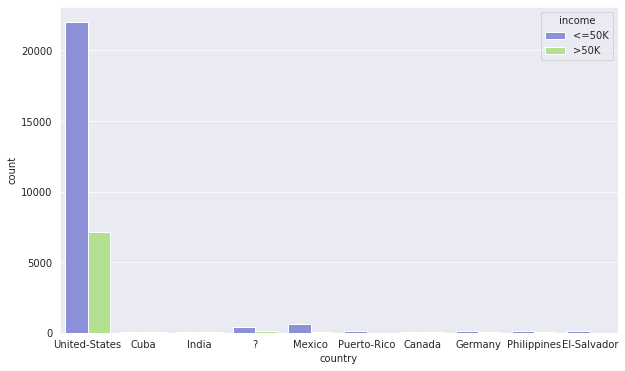

In [37]:
# checking income distribution in top 10 countries
locations=[country for country in dict(income["country"].value_counts()[:10])]
country_income = income.loc[income['country'].isin(locations)]
with sn.axes_style("darkgrid"):
    fig,ax=plt.subplots(1,1,figsize=(10,6))
    sn.countplot(x=country_income["country"],hue=country_income["income"],palette=["#7f85e5","#b2ee84"]);

United States Has the highest number of peopel earning greater than 50,000

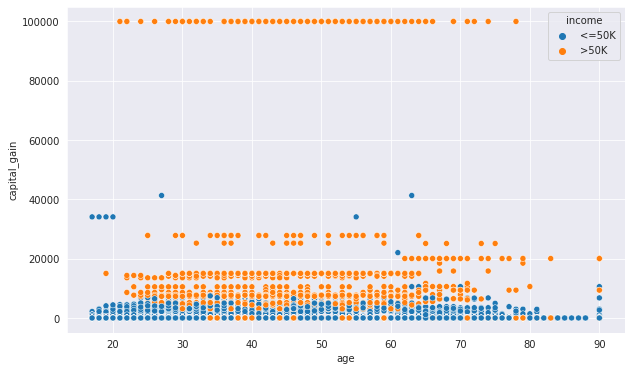

In [38]:
with sn.axes_style("darkgrid"):
    fig,ax=plt.subplots(figsize=(10,6))
    sn.scatterplot(y="capital_gain",x="age",data=income,hue="income");

#### 2.2.2 Data Splitting
Splitting features into categorical and numerical to analyze the relationships between similar and dissimilar data types in an organized manner. 

In [39]:
num_df = pd.DataFrame()
cat_df = pd.DataFrame()
for cols in income.columns:
    if income[cols].dtypes!="O":
        num_df[cols] = income[cols]
    else:
        cat_df[cols] = income[cols]

#### 2.2.2.1 Numerical Variables

In [40]:
# Calculating skewness,kurtosis,standard deviation and variance for all columns and storing it in a dataframe called "dist_info"
skewness = []
kurt = []
std_dev = []
var = []
for col in num_df:
    col_skew = skew(num_df[col])
    col_kurt= num_df[col].kurt()
    col_std = np.std(num_df[col])
    col_var = (np.std(num_df[col]))**2
    skewness.append(col_skew)
    kurt.append(col_kurt)
    std_dev.append(col_std)
    var.append(col_var)
    
dist_info = pd.DataFrame(data=list(zip(skewness,kurt,std_dev,var)),
                         columns=["Skewness","Kurtosis","Standard Deviation","Variance"],index=num_df.columns)
dist_info

,Skewness,Kurtosis,Standard Deviation,Variance
Unnamed: 0,0.000000,-1.200000,9399.551053,8.835156e+07
age,0.558718,-0.166127,13.640223,1.860557e+02
fnlwgt,1.446913,6.218811,105548.356881,1.114046e+10
education_num,-0.311662,0.623444,2.572681,6.618687e+00
capital_gain,11.953297,154.799438,7385.178677,5.454086e+07
capital_loss,4.594417,20.376802,402.954031,1.623720e+05
hr_per_week,0.227632,2.916687,12.347239,1.524543e+02


In [41]:
# Function to create box plots to check outliers in the features
def boxplot(column_name,dataframe):
    with sn.axes_style("darkgrid"):
        fig,ax=plt.subplots(figsize=(8,6))
        sn.boxplot(x=dataframe[column_name],width=0.8,notch=True,ax=ax,data=dataframe)

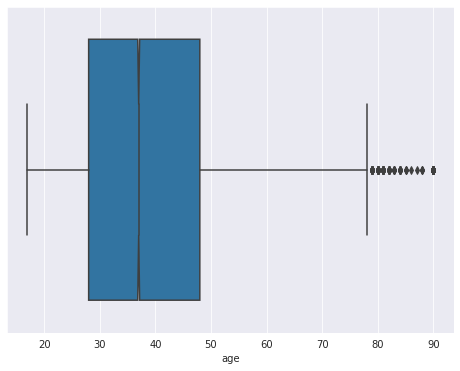

In [42]:
boxplot("age",num_df)

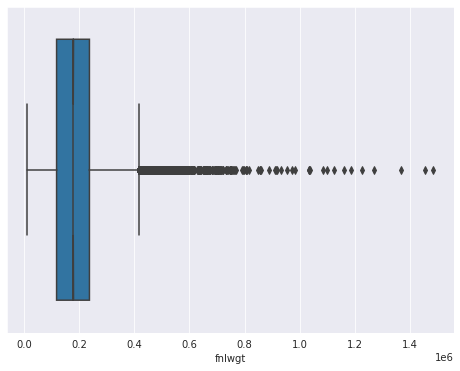

In [43]:
boxplot("fnlwgt",num_df)

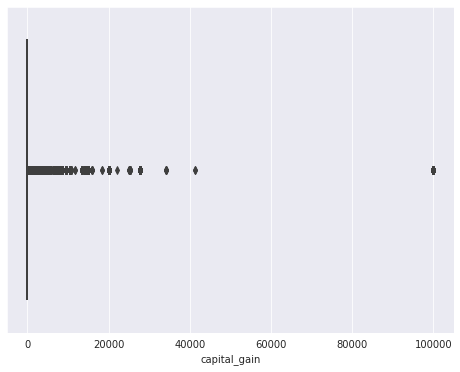

In [44]:
boxplot("capital_gain",num_df)

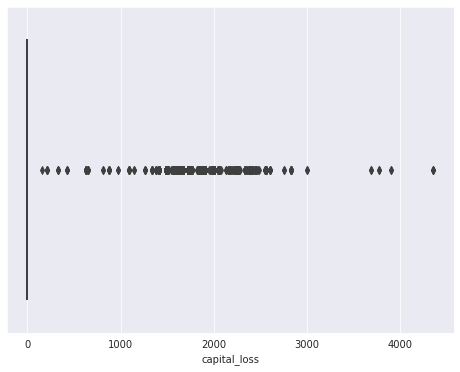

In [45]:
boxplot("capital_loss",num_df)

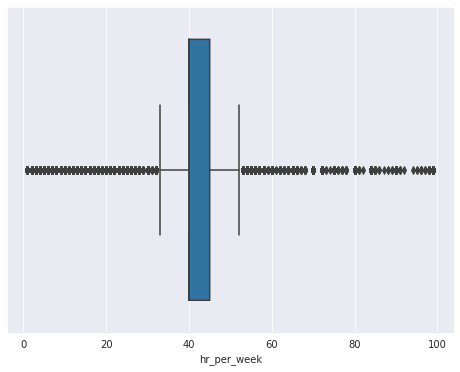

In [46]:
boxplot("hr_per_week",num_df)

In [47]:
# outlier percentage in numeric columns
for cols in num_df.columns:
    upper_bound = np.mean(num_df[cols])+3*(num_df[cols].std())
    lower_bound = np.mean(num_df[cols])-3*(num_df[cols].std())
    outlier_percentage=(len(num_df[(num_df[cols]<lower_bound) | (num_df[cols]>upper_bound)])/len(num_df))*100
    print(cols+":",outlier_percentage)

Unnamed: 0: 0.0
age: 0.371610208531679
fnlwgt: 1.0656920856239058
education_num: 0.672583765854857
capital_gain: 0.6602991308620743
capital_loss: 4.514603359847671
hr_per_week: 1.3513098492061055


From the above mentioned cells, we can see that percentage of outliers is acceptable and need not be treated.

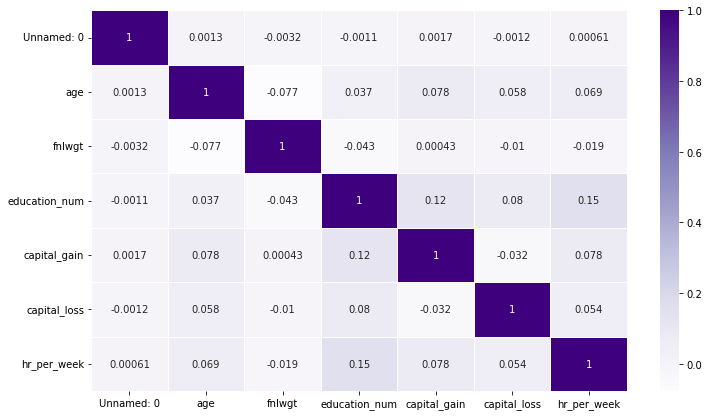

In [48]:
# checking correlation of numerical features
fig,ax=plt.subplots(1,1,figsize=(12,7))
correlation_matrix = num_df.corr()
sn.heatmap(correlation_matrix,annot=True,cbar=True,cmap="Purples",linewidth=0.5,ax=ax);

From the above heatmap, we can see that the correlation coefficients range from -0.077 to 0.12, which means that all features have very weak correlation with each other.

#### 2.2.2.2 Categorical Variables 

In [49]:
# creating a function for plotting boxplots 
def cat_boxplot(col1,col2):
    with sn.axes_style("whitegrid"):
        plt.figure(figsize=(11,7))
        sn.boxplot(x=income[col1],y=income[col2]);
        plt.title(f"Boxplot for {col1} with {col2}",fontsize=16)

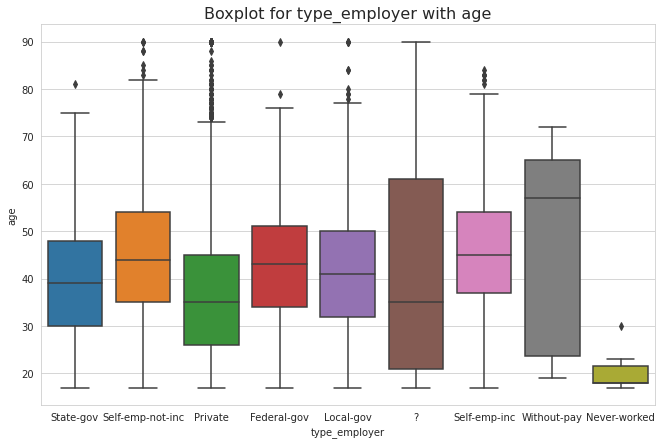

In [50]:
cat_boxplot("type_employer","age")

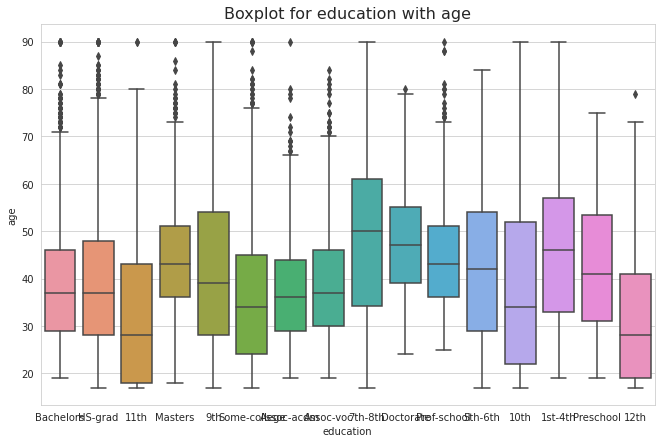

In [51]:
cat_boxplot("education","age")

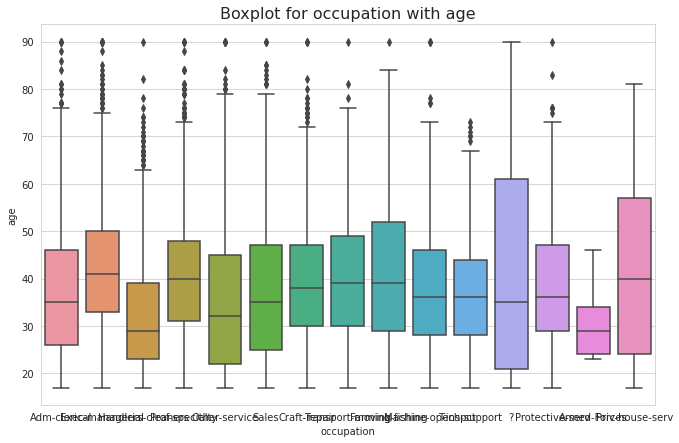

In [52]:
cat_boxplot("occupation","age")

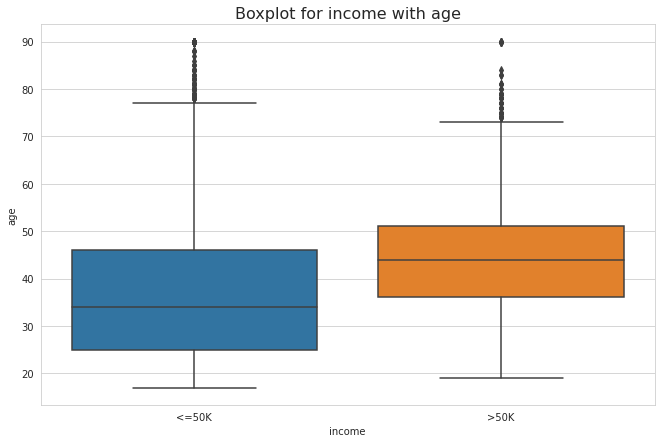

In [53]:
cat_boxplot("income","age")

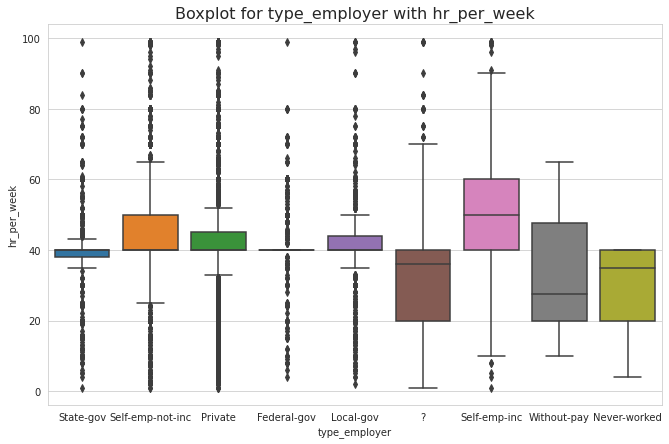

In [54]:
cat_boxplot("type_employer","hr_per_week")

<a href="#Table-of-Contents">Back To Top</a>

# 3. Missing Value Treatment using DataWig

From Exploratory Data Analysis, we found that certain variables such as "occupation","type_employer" and "country" had inconsistent data entries, specifically, the presence of "?" entries. These values will be replaced by np.nan values, and treated accordingly.

In [55]:
missing_income=income.replace({"?":np.nan})

# dropping "Unnamed :0"
missing_income= missing_income.drop("Unnamed: 0",axis=1)

In [56]:
# DataWig first determines the type of each column, then each column is converted into a numeric representation.
# Categorical columns are one hot encoded while sequential(text) columns are converted into a sequence 
# based on the length and the characters in the string. 
# Next comes the most important step — Featurizing.
# One-hot encoded data is passed through an embedding layer while sequential data is passed either via-
# an LSTM layer or n-gram hashing is done on it. 
# Finally, all the features are merged and passed through a logistic layer for the imputation.

In [57]:
missing_income.isnull().sum()

age                 0
type_employer    1836
fnlwgt              0
education           0
education_num       0
marital             0
occupation       1843
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hr_per_week         0
country           583
income              0
dtype: int64

In [58]:
## Imputing "type_employer"
df_train, df_test = random_split(missing_income, split_ratios=[0.8, 0.2])
imputer = SimpleImputer(
    # columns containing information about the column we want to impute
    input_columns=['type_employer','age','education_num', 'capital_gain'
                   ,'capital_loss','hr_per_week','education','marital','occupation',
                   'relationship','race','sex','country', 'income'],
    # the column we'd like to impute values for    
    output_column='type_employer'
)

# Fit an imputer model on train data with hyper parameter optimization 
imputer.fit(train_df=missing_income,num_epochs=15)

# Impute missing values and return original dataframe with predictions
prediction1 =imputer.predict(missing_income)

2021-09-26 19:49:14,362 [INFO]  CategoricalEncoder for column type_employer                                found only 14 occurrences of value Without-pay
2021-09-26 19:49:14,386 [INFO]  CategoricalEncoder for column type_employer                                found only 7 occurrences of value Never-worked
2021-09-26 19:49:29,482 [WARNING]  Test set does not contain any ocurrences of values [Without-pay, Never-worked] in column [type_employer], consider using a more representative test set.
2021-09-26 19:49:29,524 [INFO]  
========== start: fit model
2021-09-26 19:49:29,525 [WARNING]  Already bound, ignoring bind()
2021-09-26 19:49:38,170 [INFO]  Epoch[0] Batch [0-865]	Speed: 1610.05 samples/sec	cross-entropy=0.398491	type_employer-accuracy=0.881712
2021-09-26 19:49:47,517 [INFO]  Epoch[0] Train-cross-entropy=0.243386
2021-09-26 19:49:47,517 [INFO]  Epoch[0] Train-type_employer-accuracy=0.938476
2021-09-26 19:49:47,517 [INFO]  Epoch[0] Time cost=17.990
2021-09-26 19:49:47,567 [INFO]  S

2021-09-26 19:54:28,611 [INFO]  Epoch[12] Validation-type_employer-accuracy=1.000000
2021-09-26 19:54:38,201 [INFO]  Epoch[13] Batch [0-865]	Speed: 1446.35 samples/sec	cross-entropy=0.000005	type_employer-accuracy=1.000000
2021-09-26 19:54:47,699 [INFO]  Epoch[13] Train-cross-entropy=0.000004
2021-09-26 19:54:47,699 [INFO]  Epoch[13] Train-type_employer-accuracy=1.000000
2021-09-26 19:54:47,700 [INFO]  Epoch[13] Time cost=19.088
2021-09-26 19:54:47,706 [INFO]  Saved checkpoint to "type_employer\model-0013.params"
2021-09-26 19:54:48,516 [INFO]  Epoch[13] Validation-cross-entropy=0.000003
2021-09-26 19:54:48,517 [INFO]  Epoch[13] Validation-type_employer-accuracy=1.000000
2021-09-26 19:54:59,209 [INFO]  Epoch[14] Batch [0-865]	Speed: 1295.85 samples/sec	cross-entropy=0.000002	type_employer-accuracy=1.000000
2021-09-26 19:55:08,795 [INFO]  Epoch[14] Train-cross-entropy=0.000002
2021-09-26 19:55:08,796 [INFO]  Epoch[14] Train-type_employer-accuracy=1.000000
2021-09-26 19:55:08,796 [INFO] 

In [59]:
# 2nd Categorical Imputation - 'Occupation'

imputer = SimpleImputer(
    # columns containing information about the column we want to impute
    input_columns=['type_employer','age','education_num', 'capital_gain','capital_loss','hr_per_week',
                   'education','marital','occupation','relationship','race','sex','country', 'income'],
    # the column we'd like to impute values for
    output_column='occupation'
)

# Fit an imputer model on the train data with hyper parameter optimization
imputer.fit(train_df=prediction1, num_epochs=15)

# Impute missing values and return original dataframe with predictions
prediction2 = imputer.predict(prediction1)

In [60]:
## Imputing "country"
imputer = SimpleImputer(
    # columns containing information about the column we want to impute
    input_columns=['type_employer','age','education_num', 'capital_gain','capital_loss','hr_per_week',
                   'education','marital','occupation','relationship','race','sex','country', 'income'], 
    # the column we'd like to impute values for
    output_column='country'
)
# Fit an imputer model on train data with hyper parameter optimization 
imputer.fit(train_df=prediction2,num_epochs=30)

# Impute missing values and return original dataframe with predictions
prediction3 =imputer.predict(prediction2)

C:\Users\Sidhant Mathur\Desktop\Projects\Income_Data\income_data_env\lib\site-packages\datawig\calibration.py:92: RuntimeWarning: divide by zero encountered in log
  return np.log(probas)
C:\Users\Sidhant Mathur\Desktop\Projects\Income_Data\income_data_env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
prediction3.isnull().sum()

age                               0
type_employer                  1836
fnlwgt                            0
education                         0
education_num                     0
marital                           0
occupation                     1843
relationship                      0
race                              0
sex                               0
capital_gain                      0
capital_loss                      0
hr_per_week                       0
country                         583
income                            0
type_employer_imputed             0
type_employer_imputed_proba       0
occupation_imputed                0
occupation_imputed_proba          0
country_imputed                   0
country_imputed_proba             0
dtype: int64

In [62]:
## Dropping education_num,type_employer,occupation and country 
final_income = prediction3.drop(["education_num","type_employer","occupation","country"],axis=1)

In [63]:
# Replacing income features with numerical values to conver the target variable
final_income["income"].replace({"<=50K":0,">50K":1},inplace=True)

In [64]:
# converting the data into absolute values for standardisation/normalization
final_income["type_employer_imputed_proba"] = final_income["type_employer_imputed_proba"].abs()
final_income["occupation_imputed_proba"] = final_income["occupation_imputed_proba"].abs()
final_income["country_imputed_proba"] = final_income["country_imputed_proba"].abs()

In [65]:
# saving this data 
# final_income.to_csv("clean_data.csv",index=False)

<a href="#Table-of-Contents">Back To Top</a>

## 4. Feature Encoding

In [66]:
cat_boost = ce.CatBoostEncoder()

# Splitting the data into features and target variable
X= final_income.drop("income",axis=1)
y=final_income["income"]

# Fitting Catboost Algorithm on the categorical variables in the feature matrix 
cat_boost_income = cat_boost.fit_transform(X,y)

In [67]:
cat_boost_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age                            32561 non-null int64
fnlwgt                         32561 non-null int64
education                      32561 non-null float64
marital                        32561 non-null float64
relationship                   32561 non-null float64
race                           32561 non-null float64
sex                            32561 non-null float64
capital_gain                   32561 non-null int64
capital_loss                   32561 non-null int64
hr_per_week                    32561 non-null int64
type_employer_imputed          32561 non-null float64
type_employer_imputed_proba    32561 non-null float64
occupation_imputed             32561 non-null float64
occupation_imputed_proba       32561 non-null float64
country_imputed                32561 non-null float64
country_imputed_proba          32561 non-null float64
dtypes: float64(11), int64(5)
memory 

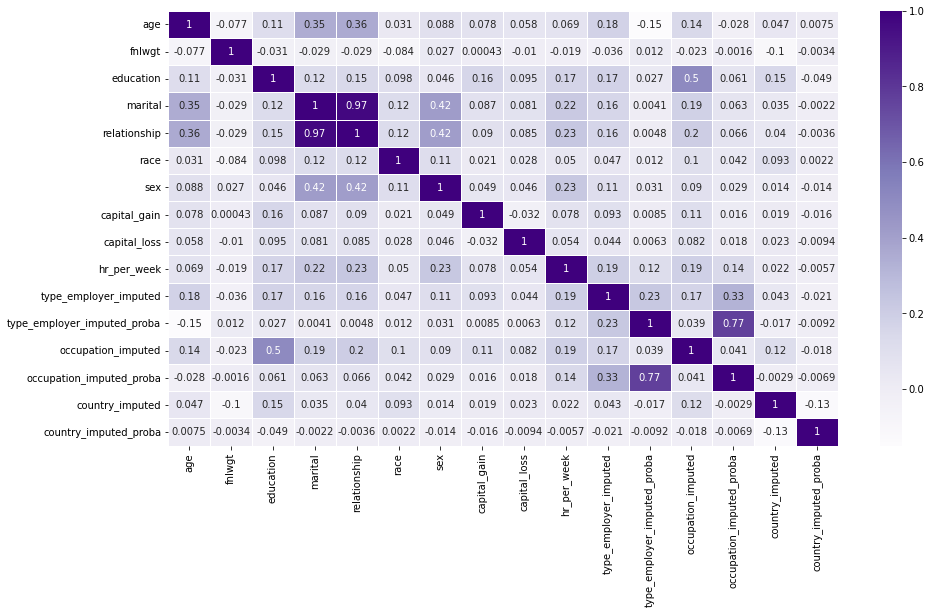

In [68]:
#### Checking correlation after categorical encoding 
fig,ax=plt.subplots(1,1,figsize=(15,8))
correlation_matrix = cat_boost_income.corr()
sn.heatmap(correlation_matrix,annot=True,cbar=True,cmap="Purples",linewidth=0.5,ax=ax);

<a href="#Table-of-Contents">Back To Top</a>

## 5. Feature Transformation

In [69]:
# Normalization (Bring the output between 0 & 1 - For Non Gausssian data distribution) &
# Standardization (Bring the output in a way such that Mean=0, and Std Dev=1)

# Splitting the dataset into features matrix and target variable 
X = cat_boost_income
y = final_income["income"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(26048, 16) (6513, 16) (26048,) (6513,)


In [70]:
## Normalisation 

# Instanciating and fitting MinMaxScaler on the training data 
norm_scaler = MinMaxScaler()
norm_scaler.fit(X_train)

# Transforming training and testing data
X_train_norm = pd.DataFrame(norm_scaler.transform(X_train))
X_test_norm = pd.DataFrame(norm_scaler.transform(X_test))

In [71]:
## Standardization 
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# Instanciating and fitting StandardScaler on the numerical columns of training data
for cols in cat_boost_income:
    stand_scaler = StandardScaler()
    
    # Fitting the scaler on training column
    stand_scaler.fit(X_train_stand[[cols]])
    
    # Transforming training and testing columns
    X_train_stand[cols]=stand_scaler.transform(X_train_stand[[cols]])
    X_test_stand[cols]=stand_scaler.transform(X_test_stand[[cols]])

In [72]:
# Fitting various baseline models to check which type of feature transformation provides best results

# K Nearest Neighbors
rmse_scores = []
train_X= [X_train,X_train_norm,X_train_stand]
test_X = [X_test,X_test_norm, X_test_stand]

#instanciate knn model 
knn_model = KNeighborsClassifier(n_neighbors=7)

for i in range(len(train_X)):
    #iterating over the list of training data 
    knn_model.fit(train_X[i],y_train)
    
    # predicting X_test
    preds = knn_model.predict(test_X[i])
    
    # appending rmse score to list "rmse_score"
    rmse_scores.append(np.sqrt(mean_squared_error(y_test,preds)))
    
# creating a dataframe to store results 
knn_df = pd.DataFrame({"RMSE":rmse_scores},index=["Baseline","Normalised","Standardized"])
knn_df

,RMSE
Baseline,0.458805
Normalised,0.398446
Standardized,0.393990


In [73]:
# Support Vector Machine
rmse_scores = []
train_X= [X_train,X_train_norm,X_train_stand]
test_X = [X_test,X_test_norm, X_test_stand]

#instanciate SVC model 
svr_model = SVC(kernel='rbf',C=5)
for i in range(len(train_X)):
    #iterating over the list of training data 
    svr_model.fit(train_X[i],y_train)
    
    # predicting X_test
    preds = svr_model.predict(test_X[i])
    
    # appending rmse score to list "rmse_score"
    rmse_scores.append(np.sqrt(mean_squared_error(y_test,preds)))
    
# creating a dataframe to store results 
svc_df = pd.DataFrame({"RMSE":rmse_scores},index=["Baseline","Normalised","Standardized"])
svc_df

,RMSE
Baseline,0.442624
Normalised,0.378284
Standardized,0.374408


In [74]:
rmse_scores = []
train_X = [X_train,X_train_norm,X_train_stand]
test_X = [X_test,X_test_norm,X_test_stand]

# instanciate logistic regression 
lr = LogisticRegression(solver='liblinear')
for i in range(len(train_X)):
    #iterating over list of training data
    lr.fit(train_X[i],y_train)
    
    # predicting test set
    preds=lr.predict(test_X[i])
    
    # appending rmse score to the list
    rmse_scores.append(np.sqrt(mean_squared_error(y_test,preds)))
    
# creating a dataframe for evaluation of scaling methods 
log_df = pd.DataFrame({"rmse":rmse_scores},index=["Baseline","Normalised","Standardized"])
log_df

,rmse
Baseline,0.443663
Normalised,0.382722
Standardized,0.381718


From the above experiment, we can conclude that standardisation performed better since the root mean square error was minimum when the estimators were training on standardized data. Hence, we will be standardizing our dataset.

In [75]:
stand_data=pd.DataFrame(StandardScaler().fit_transform(cat_boost_income))

<a href="#Table-of-Contents">Back To Top</a>

## 6. Feature Selection and Elimination

### 6.1. Principal Component Analysis

Optimal Number of components are:  15


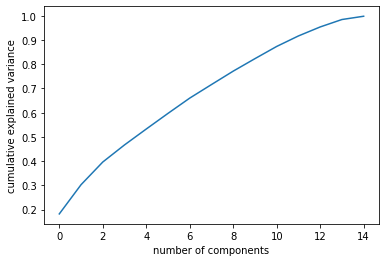

In [76]:
# choosing the right number of principal components
pca = PCA(0.99).fit(stand_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print("Optimal Number of components are: ",pca.n_components_)

In [77]:
# Applying PCA on stand_data
pca_df = pd.DataFrame(PCA(0.99).fit_transform(stand_data))
pca_df.reset_index(drop=True,inplace=True)
final_income["income"].reset_index(drop=True,inplace=True)

# Concatinating final_income["income"] and pca_df to form final dataset 
final_data = pd.concat([pca_df,final_income[["income"]]],axis=1)

### 6.2 Recursive Feature Elimination with Cross Validation

In [78]:
# Recursive Feature Elimination with Cross-Validation (RFECV) and Random Forest
# is basically a backward selection of the predictors. This technique begins by building a model on the entire set of 
# predictors and computing an importance score for each predictor. The least important predictor(s) are then removed, 
# the model is re-built, and importance scores are computed again. 
# In practice, the analyst specifies the number of predictor subsets to evaluate as well as each subset’s size. 
# Therefore, the subset size is a tuning parameter for RFE. The subset size that optimizes the performance criteria is 
# used to select the predictors based on the importance rankings. The optimal subset is then used to train the final model.

In [79]:
# Splitting into Training & Testing data & Feature Scaling the 2 divisions basis the experiment done earlier.
X= final_data.drop("income",axis=1)
y=final_data['income']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, random_state=30)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
# Identifying the features of RFE-CV with RF
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

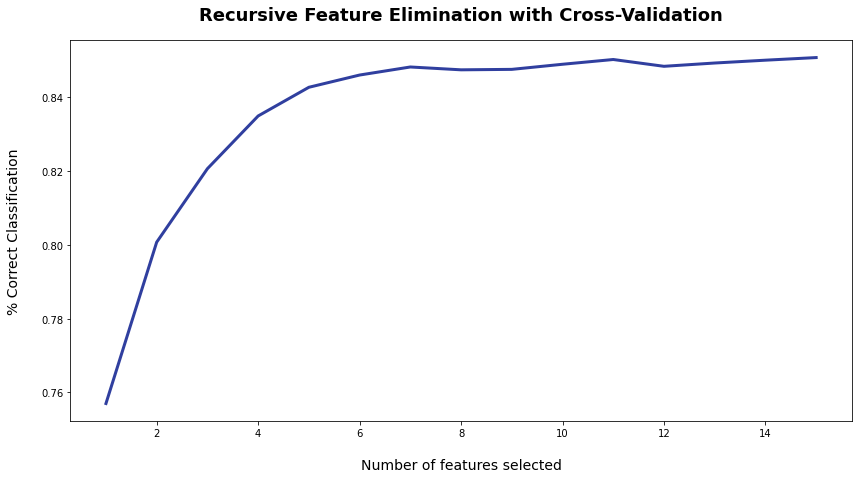

In [81]:
# Plotting the accuracy obtained with every features used:
plt.figure(figsize=(14, 7))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [82]:
rfecv.score(X_train,y_train)

0.8621007371007371

In [83]:
rfecv.score(X_test, y_test)

0.8681099339781975

In [84]:
# data after feature encoding
# cat_boost_income.to_csv("encoded_income_data.cav")

# standardized dataset 
# stand_data.to_csv("standardized_income_data.csv")

# final_income.to_csv("final_data.csv")

# modelling data
# final_data.to_csv("modelling_data.csv")

<a href="#Table-of-Contents">Back To Top</a>

## 7. Data Modelling

In [85]:
X = final_data.drop('income',axis=1)
y = final_data['income']

# Split into training and testing subsets and feature scaling the data according to the previous experiment
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(26048, 15) (6513, 15) (26048,) (6513,)


### 7.1 Support Vector Machine 

In [86]:
svc_model = SVC(probability=True)
svc_model.fit(X_train,y_train)
print("Training Score: ",svc_model.score(X_train,y_train))
print("Testing Score: ",svc_model.score(X_test,y_test))

Training Score:  0.8617168304668305
Testing Score:  0.8564409642253954


In [87]:
# Precision and Recall 
svc_y_preds = svc_model.predict(X_test)
print(classification_report(y_test,svc_y_preds))
y_prob_svc=svc_model.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4908
           1       0.79      0.57      0.66      1605

    accuracy                           0.86      6513
   macro avg       0.83      0.76      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [88]:
# Checking with cross validation 
svc_cross_val_score = cross_val_score(svc_model,X,y)
print(svc_cross_val_score)

[0.84707508 0.85104423 0.85472973 0.85257985 0.85257985]


[[4663  245]
 [ 690  915]]


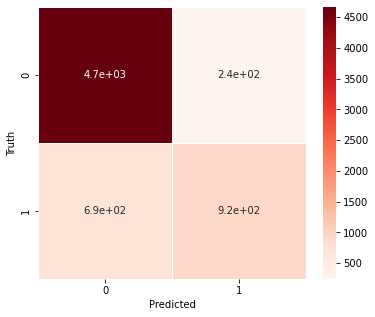

In [89]:
# Making a confusion matrix 
svc_cm = confusion_matrix(y_test,svc_y_preds)
print(svc_cm)
fig,ax = plt.subplots(1,1,figsize=(6,5))
sn.heatmap(svc_cm,annot=True,cmap="Reds",ax=ax,linewidth=0.8,cbar=True);
plt.xlabel("Predicted");
plt.ylabel("Truth");

In [90]:
accuracy_svc = round(accuracy_score(y_test,svc_y_preds),3)
precision_svc = round(precision_score(y_test,svc_y_preds),3)
recall_svc = round(recall_score(y_test,svc_y_preds),3)
f1_svc = round(f1_score(y_test,svc_y_preds),3)
print("Accuracy Score: ",accuracy_svc)
print("Precision: ",precision_svc)
print("Recall: ",recall_svc)
print("f1: ",f1_svc)

Accuracy Score:  0.856
Precision:  0.789
Recall:  0.57
f1:  0.662


### 7.2 Decision Tree Classifier 

In [91]:
dtc_model = DecisionTreeClassifier(random_state=100)
dtc_model.fit(X_train,y_train)
print("Training Score: ",dtc_model.score(X_train,y_train))
print("Testing Score: ",dtc_model.score(X_test,y_test))

Training Score:  1.0
Testing Score:  0.7944111776447106


In [92]:
# Precision and Recall 
dtc_y_preds = dtc_model.predict(X_test)
print(classification_report(y_test,dtc_y_preds))
y_prob_dtc=dtc_model.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4908
           1       0.58      0.60      0.59      1605

    accuracy                           0.79      6513
   macro avg       0.72      0.73      0.73      6513
weighted avg       0.80      0.79      0.80      6513



In [93]:
# Checking with cross validation 
dtc_cross_val_score = cross_val_score(dtc_model,X,y)
print(dtc_cross_val_score)

[0.78627361 0.79407248 0.79745086 0.79714373 0.79714373]


[[4215  693]
 [ 646  959]]


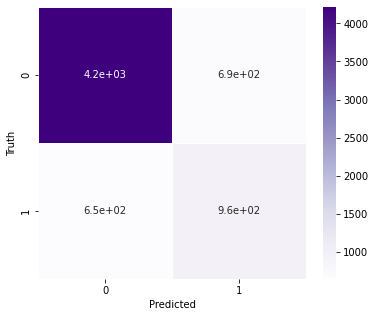

In [94]:
# Making a confusion matrix 
dtc_cm = confusion_matrix(y_test,dtc_y_preds)
print(dtc_cm)
fig,ax = plt.subplots(1,1,figsize=(6,5))
sn.heatmap(dtc_cm,annot=True,cmap="Purples",ax=ax,linewidth=0.8,cbar=True);
plt.xlabel("Predicted");
plt.ylabel("Truth");

In [95]:
accuracy_dtc = round(accuracy_score(y_test,dtc_y_preds),3)
precision_dtc = round(precision_score(y_test,dtc_y_preds),3)
recall_dtc = round(recall_score(y_test,dtc_y_preds),3)
f1_dtc = round(f1_score(y_test,dtc_y_preds),3)
print("Accuracy Score: ",accuracy_dtc)
print("Precision: ",precision_dtc)
print("Recall: ",recall_dtc)
print("f1: ",f1_dtc)

Accuracy Score:  0.794
Precision:  0.581
Recall:  0.598
f1:  0.589


### 7.3 Random Forest Classifier

In [96]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
print("Training Score :",rfc_model.score(X_train,y_train))
print("Testing Score :",rfc_model.score(X_test,y_test))

Training Score : 1.0
Testing Score : 0.8556732688469215


In [97]:
# Precision and Recall 
rfc_y_preds = rfc_model.predict(X_test)
print(classification_report(y_test,rfc_y_preds))
y_prob_rfc=rfc_model.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4908
           1       0.75      0.62      0.68      1605

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [98]:
rfc_cross_val_score = cross_val_score(rfc_model,X,y)
print(rfc_cross_val_score)

[0.84339014 0.84920147 0.85257985 0.85334767 0.85580467]


[[4575  333]
 [ 607  998]]


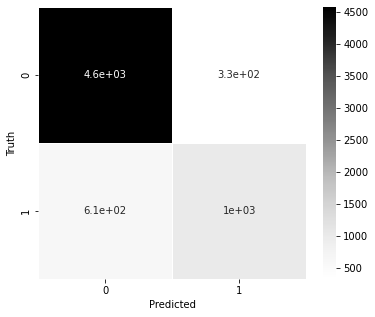

In [99]:
# Making a confusion matrix 
rfc_cm = confusion_matrix(y_test,rfc_y_preds)
print(rfc_cm)
fig,ax = plt.subplots(1,1,figsize=(6,5))
sn.heatmap(rfc_cm,annot=True,cmap="Greys",ax=ax,linewidth=0.8,cbar=True);
plt.xlabel("Predicted");
plt.ylabel("Truth");

In [100]:
accuracy_rfc = round(accuracy_score(y_test,rfc_y_preds),3)
precision_rfc = round(precision_score(y_test,rfc_y_preds),3)
recall_rfc = round(recall_score(y_test,rfc_y_preds),3)
f1_rfc = round(f1_score(y_test,rfc_y_preds),3)
print("Accuracy Score: ",accuracy_rfc)
print("Precision: ",precision_rfc)
print("Recall: ",recall_rfc)
print("f1: ",f1_rfc)

Accuracy Score:  0.856
Precision:  0.75
Recall:  0.622
f1:  0.68


### 7.4 Logistic Regression 

In [101]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
print("Training Score: ",logit_model.score(X_train,y_train))
print("Training Score: ",logit_model.score(X_test,y_test))

Training Score:  0.8460534398034398
Training Score:  0.8460003070781514


In [102]:
# Precision and Recall 
logit_y_preds = logit_model.predict(X_test)
print(classification_report(y_test,logit_y_preds))
y_prob_lr=logit_model.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4908
           1       0.75      0.56      0.64      1605

    accuracy                           0.85      6513
   macro avg       0.81      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



In [103]:
# cross val
logit_cross_val_score = cross_val_score(logit_model,X,y)
print(logit_cross_val_score)

[0.83755566 0.84336609 0.84858722 0.85012285 0.84781941]


[[4575  333]
 [ 607  998]]


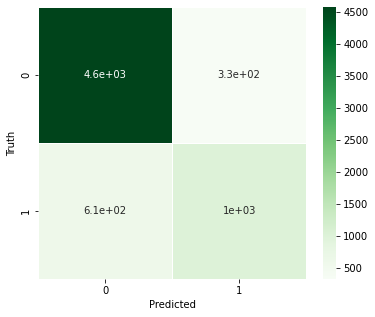

In [104]:
# Making a confusion matrix 
logit_cm = confusion_matrix(y_test,rfc_y_preds)
print(logit_cm)
fig,ax = plt.subplots(1,1,figsize=(6,5))
sn.heatmap(logit_cm,annot=True,cmap="Greens",ax=ax,linewidth=0.8,cbar=True);
plt.xlabel("Predicted");
plt.ylabel("Truth");

In [105]:
accuracy_logit = round(accuracy_score(y_test,logit_y_preds),3)
precision_logit = round(precision_score(y_test,logit_y_preds),3)
recall_logit = round(recall_score(y_test,logit_y_preds),3)
f1_logit = round(f1_score(y_test,logit_y_preds),3)
print("Accuracy Score: ",accuracy_logit)
print("Precision: ",precision_logit)
print("Recall: ",recall_logit)
print("f1: ",f1_logit)

Accuracy Score:  0.846
Precision:  0.751
Recall:  0.561
f1:  0.642


### 7.5 K nearest neighbor

In [106]:
nbrs_model = KNeighborsClassifier(n_neighbors=7)
nbrs_model.fit(X_train,y_train)
print("Training Score: ",nbrs_model.score(X_train,y_train))
print("Training Score: ",nbrs_model.score(X_test,y_test))

Training Score:  0.8725429975429976
Training Score:  0.8420082911100876


In [107]:
# Precision and Recall 
nbrs_y_preds = nbrs_model.predict(X_test)
print(classification_report(y_test,nbrs_y_preds))
y_prob_nbrs=nbrs_model.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4908
           1       0.71      0.61      0.65      1605

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.78      6513
weighted avg       0.84      0.84      0.84      6513



In [108]:
nbrs_cross_val_score = cross_val_score(logit_model,X,y)
print(nbrs_cross_val_score)

[0.83755566 0.84336609 0.84858722 0.85012285 0.84781941]


[[4508  400]
 [ 629  976]]


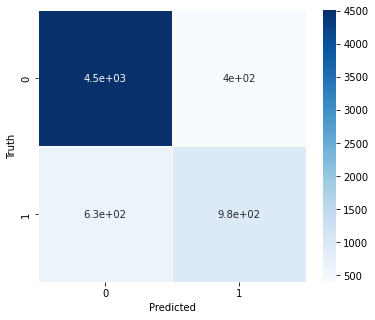

In [109]:
# Making a confusion matrix 
nbrs_cm = confusion_matrix(y_test,nbrs_y_preds)
print(nbrs_cm)
fig,ax = plt.subplots(1,1,figsize=(6,5))
sn.heatmap(nbrs_cm,annot=True,cmap="Blues",ax=ax,linewidth=0.8,cbar=True);
plt.xlabel("Predicted");
plt.ylabel("Truth");

In [110]:
accuracy_nbrs = round(accuracy_score(y_test,nbrs_y_preds),3)
precision_nbrs = round(precision_score(y_test,nbrs_y_preds),3)
recall_nbrs = round(recall_score(y_test,nbrs_y_preds),3)
f1_nbrs = round(f1_score(y_test,nbrs_y_preds),3)
print("Accuracy Score: ",accuracy_nbrs)
print("Precision: ",precision_nbrs)
print("Recall: ",recall_nbrs)
print("f1: ",f1_nbrs)

Accuracy Score:  0.842
Precision:  0.709
Recall:  0.608
f1:  0.655


<a href="#Table-of-Contents">Back To Top</a>

## 8. Model Evaluation

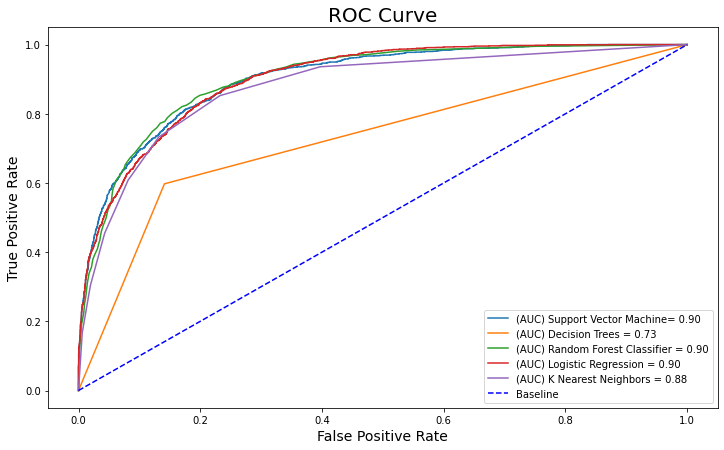

In [111]:
## Plotting AUC-ROC Curves for all models 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

auc_svc = roc_auc_score(y_test,y_prob_svc)
fpr_svc,tpr_svc,threshold_svc = roc_curve(y_test,y_prob_svc)

auc_dtc = roc_auc_score(y_test,y_prob_dtc)
fpr_dtc,tpr_dtc,threshold_dtc = roc_curve(y_test,y_prob_dtc)

auc_rfc = roc_auc_score(y_test,y_prob_rfc)
fpr_rfc,tpr_rfc,threshold_rfc = roc_curve(y_test,y_prob_rfc)

auc_lr = roc_auc_score(y_test,y_prob_lr)
fpr_lr,tpr_lr,threshold_lr = roc_curve(y_test,y_prob_lr)

auc_nb = roc_auc_score(y_test,y_prob_nbrs)
fpr_nb,tpr_nb,threshold_nb = roc_curve(y_test,y_prob_nbrs)

plt.figure(figsize=(12,7))
plt.plot(fpr_svc,tpr_svc,label=f"(AUC) Support Vector Machine= {auc_svc:.2f}")
plt.plot(fpr_dtc,tpr_dtc,label=f"(AUC) Decision Trees = {auc_dtc:.2f}")
plt.plot(fpr_rfc,tpr_rfc,label=f"(AUC) Random Forest Classifier = {auc_rfc:.2f}")
plt.plot(fpr_lr,tpr_lr,label=f"(AUC) Logistic Regression = {auc_lr:.2f}")
plt.plot(fpr_nb,tpr_nb,label=f"(AUC) K Nearest Neighbors = {auc_nb:.2f}")
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();
plt.show()

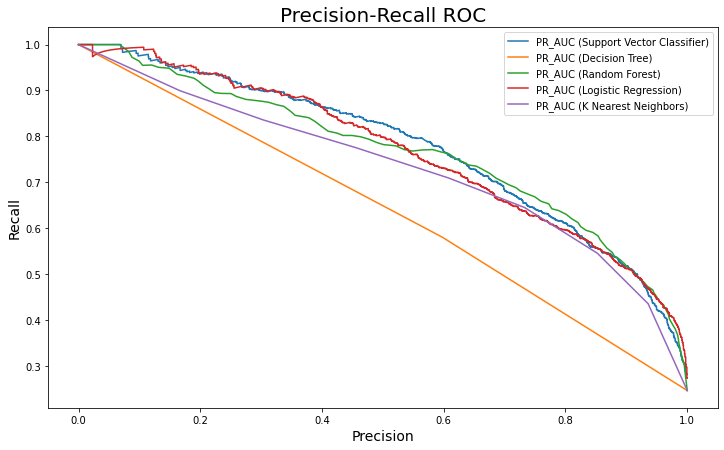

In [112]:
## plotting a precision- recall curve 
pres_svc,rec_svc,threshold_svc = precision_recall_curve(y_test,y_prob_svc)
auc_svc = (pres_svc,rec_svc)
pres_dtc,rec_dtc,threshold_dtc = precision_recall_curve(y_test,y_prob_dtc)
auc_svc = (pres_dtc,rec_dtc)
pres_rfc,rec_rfc,threshold_rfc = precision_recall_curve(y_test,y_prob_rfc)
auc_svc = (pres_rfc,rec_rfc)
pres_lr,rec_lr,threshold_lr = precision_recall_curve(y_test,y_prob_lr)
auc_svc = (pres_lr,rec_lr)
pres_nb,rec_nb,threshold_nb = precision_recall_curve(y_test,y_prob_nbrs)
auc_nb =(pres_nb,rec_nb)

plt.figure(figsize=(12,7))
plt.plot(rec_svc, pres_svc, label='PR_AUC (Support Vector Classifier)')
plt.plot(rec_dtc, pres_dtc, label=f'PR_AUC (Decision Tree)')
plt.plot(rec_rfc, pres_rfc, label=f'PR_AUC (Random Forest)')
plt.plot(rec_lr, pres_lr, label=f'PR_AUC (Logistic Regression)')
plt.plot(rec_nb, pres_nb, label=f'PR_AUC (K Nearest Neighbors)')
plt.xlabel("Precision",size=14)
plt.ylabel("Recall",size=14)
plt.title("Precision-Recall ROC",size=20)
plt.legend();
plt.show()

                          Log Loss
Logistic Regression       0.328972
Support Vector Machine    0.345153
Random Forest Classifier  0.363182
KNN                       0.979384
Decision Tree             7.100871


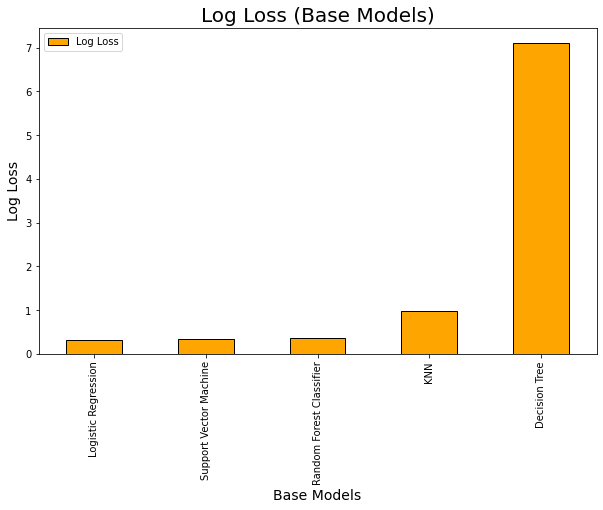

In [113]:
# plotting log-loss for all base models 
log_loss_svc = log_loss(y_test,y_prob_svc)
log_loss_dtc = log_loss(y_test,y_prob_dtc)
log_loss_rfc = log_loss(y_test,y_prob_rfc)
log_loss_lr = log_loss(y_test,y_prob_lr)
log_loss_nb = log_loss(y_test,y_prob_nbrs)
log_loss = [log_loss_svc,log_loss_dtc,log_loss_rfc,log_loss_lr,log_loss_nb]
loss_df = pd.DataFrame(log_loss,
                       index=["Support Vector Machine","Decision Tree","Random Forest Classifier","Logistic Regression","KNN"],
                       columns=["Log Loss"]
                      )
loss_df=loss_df.sort_values(by="Log Loss")
print(loss_df)
loss_df.plot.bar(color="orange",figsize=(10,6),edgecolor="black");
plt.title("Log Loss (Base Models)",size=20)
plt.xlabel("Base Models",size=14)
plt.ylabel("Log Loss",size=14);
plt.show()

Judging from the above used evaluation graphs, Decision Trees will not enter the hyperparameter tuning stage since other estimators have proven to perform better on our data

<a href="#Table-of-Contents">Back To Top</a>

## 9. Hyperparameter Tuning
Since our data contains a class imbalance, we will be using F1 score as th primary evaluation metric to be maximized i.e. model with the best F1 score will be selected.

### 9.1 Using RandomizedSearchCV

In [114]:
warnings.filterwarnings(action="ignore")
# Logistic Regression 
weights = np.linspace(0.0,0.99,200)
param_grid = {
    # choosing penalty
    "penalty":['l1','l2'],
    # Choosing degree of regularization 
    "C":[0.001,0.01,0.1,1,2,3,4,5,10,100,1000],
    # adding class weights 
    "class_weight":[{0:(1-x),1:x} for x in weights]
}
lr = LogisticRegression()

random_logit = RandomizedSearchCV(estimator=lr,param_distributions = param_grid,n_iter=100,cv=30,
                                      scoring="roc_auc",random_state=0,error_score=0).fit(X_train,y_train)
y_pred_randlr =random_logit.predict(X_test)
print("Best Score: ",random_logit.best_score_)
print("Best Parameters: ", random_logit.best_params_)
print(classification_report(y_test,y_pred_randlr))
print("Accuracy: ",round(accuracy_score(y_test,y_pred_randlr),3))
print("Precision: ",round(precision_score(y_test,y_pred_randlr),3))
print("Recall: ",round(recall_score(y_test,y_pred_randlr),3))
print("F1: ",round(f1_score(y_test,y_pred_randlr),3))

Best Score:  0.8985992665991476
Best Parameters:  {'penalty': 'l2', 'class_weight': {0: 0.35824120603015075, 1: 0.6417587939698493}, 'C': 100}
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4908
           1       0.66      0.70      0.68      1605

    accuracy                           0.84      6513
   macro avg       0.78      0.79      0.78      6513
weighted avg       0.84      0.84      0.84      6513

Accuracy:  0.836
Precision:  0.656
Recall:  0.701
F1:  0.678


In [115]:
# confusion_matrix 
confusion_matrix(y_test,y_pred_randlr)

array([[4318,  590],
       [ 480, 1125]], dtype=int64)

In [116]:
# Creating a logistic regression model with the best parameters
randomized_logit = LogisticRegression(penalty="l2",class_weight={0:0.3383417085427135, 1:0.6616582914572865},C = 10)
randomized_logit.fit(X_train,y_train)
randomized_logitpred = randomized_logit.predict(X_test)
randomized_logit_acc = accuracy_score(y_test,randomized_logitpred)
randomized_logit_precision = precision_score(y_test,randomized_logitpred)
randomized_logit_recall = recall_score(y_test,randomized_logitpred)
randomized_logit_f1 = f1_score(y_test,randomized_logitpred)
print("Accuracy:", round(randomized_logit_acc,3))
print("Precision:", round(randomized_logit_precision,3))
print("Recall:", round(randomized_logit_recall,3))
print("F1 Score:", round(randomized_logit_f1,3))

Accuracy: 0.833
Precision: 0.643
Recall: 0.725
F1 Score: 0.682


In [117]:
# Random Forest Classifier 
param_rf_grid = {
    # Number of trees in the model 
    "n_estimators": [int(x) for x in np.linspace(100,1000,20)],
    # maximum depth of the tree
    "max_depth":[int(x) for x in np.linspace(10, 110, num = 11)],
    # number of samples required at each leaf node
    "min_samples_leaf": [1, 2, 4],
    # number of features to consider at every split
    "max_features": ['auto', 'sqrt']
}
rf = RandomForestClassifier()
random_rf = RandomizedSearchCV(estimator=rf,
                                  param_distributions = param_rf_grid,n_iter=25,
                                  cv=5,scoring="roc_auc",random_state=0
                                 ).fit(X_train,y_train)
y_pred_randrf =random_rf.predict(X_test)
print("Best Score: ",random_rf.best_score_)
print("Best Parameters: ", random_rf.best_params_)
print(classification_report(y_test,y_pred_randrf))
print("Accuracy: ",round(accuracy_score(y_test,y_pred_randrf),3))
print("Precision: ",round(precision_score(y_test,y_pred_randrf),3))
print("Recall: ",round(recall_score(y_test,y_pred_randrf),3))
print("F1: ",round(f1_score(y_test,y_pred_randrf),3))

Best Score:  0.9022049540112377
Best Parameters:  {'n_estimators': 336, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4908
           1       0.76      0.58      0.66      1605

    accuracy                           0.85      6513
   macro avg       0.82      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513

Accuracy:  0.851
Precision:  0.761
Recall:  0.579
F1:  0.657


In [118]:
# confusion_matrix 
confusion_matrix(y_test,y_pred_randrf)

array([[4616,  292],
       [ 676,  929]], dtype=int64)

In [119]:
# Making a model with best hyper parameters found 
randomized_rf = RandomForestClassifier(n_estimators=810,min_samples_leaf=4,max_features="auto",max_depth=10)
randomized_rf.fit(X_train,y_train)
randomized_rf_preds = randomized_rf.predict(X_test)
randomized_rf_acc = accuracy_score(y_test,randomized_rf_preds)
randomized_rf_precision = precision_score(y_test,randomized_rf_preds)
randomized_rf_recall = recall_score(y_test,randomized_rf_preds)
randomized_rf_f1 = f1_score(y_test,randomized_rf_preds)
print("Accuracy: ",round(randomized_rf_acc,3))
print("Precision: ",round(randomized_rf_precision,3))
print("Recall: ",round(randomized_rf_recall,3))
print("F1 Score: ",round(randomized_rf_f1,3))

Accuracy:  0.851
Precision:  0.763
Recall:  0.574
F1 Score:  0.655


In [120]:
# K Nearest Neighbor
param_rf_grid={
    # Number of neighbors
    'n_neighbors':[int(x) for x in range(5,13)],
    # weight function 
    'weights':["uniform","distance"],
    'algorithm':["auto","ball_tree","kd_tree","brute"]
}
knn = KNeighborsClassifier(n_neighbors=7)
randomized_knn= RandomizedSearchCV(estimator=knn, param_distributions=param_rf_grid,cv=5,
                                   scoring="roc_auc",random_state=100, n_iter=35).fit(X_train,y_train)
y_pred_rand_knn =randomized_knn.predict(X_test)
print("Best Score: ",randomized_knn.best_score_)
print("Best Parameters: ", randomized_knn.best_params_)
print(classification_report(y_test,y_pred_rand_knn))
print("Accuracy: ",round(accuracy_score(y_test,y_pred_rand_knn),3))
print("Precision: ",round(precision_score(y_test,y_pred_rand_knn),3))
print("Recall: ",round(recall_score(y_test,y_pred_rand_knn),3))
print("F1: ",round(f1_score(y_test,y_pred_rand_knn),3))

Best Score:  0.88056393974858
Best Parameters:  {'weights': 'distance', 'n_neighbors': 12, 'algorithm': 'brute'}
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4908
           1       0.73      0.60      0.66      1605

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513

Accuracy:  0.846
Precision:  0.726
Recall:  0.602
F1:  0.658


In [121]:
# confusion_matrix 
confusion_matrix(y_test,y_pred_rand_knn)

array([[4543,  365],
       [ 639,  966]], dtype=int64)

In [122]:
# Making a model with best hyper parameters found 
randomized_knn = KNeighborsClassifier(n_neighbors=12,weights="distance",algorithm="brute")
randomized_knn.fit(X_train,y_train)
randomized_knn_preds = randomized_knn.predict(X_test)
randomized_knn_acc = accuracy_score(y_test,randomized_knn_preds)
randomized_knn_precision = precision_score(y_test,randomized_knn_preds)
randomized_knn_recall = recall_score(y_test,randomized_knn_preds)
randomized_knn_f1 = f1_score(y_test,randomized_knn_preds)
print("Accuracy: ",round(randomized_knn_acc,3))
print("Precision: ",round(randomized_knn_precision,3))
print("Recall: ",round(randomized_knn_recall,3))
print("F1 Score: ",round(randomized_knn_f1,3))

Accuracy:  0.846
Precision:  0.726
Recall:  0.602
F1 Score:  0.658


### 9.1 Using GridSearchCV

#### Logistic Regression

In [123]:
weights = np.linspace(0.01,0.99,10)
log_grid_params = {
    "penalty":["l1","l2"],
    "C":[int(x) for x in np.linspace(1,10,10)],
    "class_weight":[{0:(1-x),1:x} for x in weights],    
}
grid_lr=LogisticRegression()
grid_logit = GridSearchCV(estimator=grid_lr,param_grid=log_grid_params,scoring="roc_auc",cv=10).fit(X_train,y_train)
y_pred_grid_lr =grid_logit.predict(X_test)
print("Best Score: ",grid_logit.best_score_)
print("Best Parameters: ", grid_logit.best_params_)
print(classification_report(y_test,y_pred_grid_lr))
print("Accuracy: ",round(accuracy_score(y_test,y_pred_grid_lr),3))
print("Precision: ",round(precision_score(y_test,y_pred_grid_lr),3))
print("Recall: ",round(recall_score(y_test,y_pred_grid_lr),3))
print("F1: ",round(f1_score(y_test,y_pred_grid_lr),3))

Best Score:  0.8985221955503683
Best Parameters:  {'C': 9, 'class_weight': {0: 0.33666666666666667, 1: 0.6633333333333333}, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4908
           1       0.64      0.73      0.68      1605

    accuracy                           0.83      6513
   macro avg       0.77      0.80      0.78      6513
weighted avg       0.84      0.83      0.84      6513

Accuracy:  0.833
Precision:  0.642
Recall:  0.725
F1:  0.681


In [124]:
# Making model with the best parameters 
grid_search_lr = LogisticRegression(C=10,class_weight={0: 0.33666666666666667, 1: 0.6633333333333333},penalty='l2')
grid_search_lr.fit(X_train,y_train)
grid_search_lr_pred = grid_search_lr.predict(X_test)
grid_search_lr_acc= accuracy_score(y_test,grid_search_lr_pred)
grid_search_lr_precision = precision_score(y_test,grid_search_lr_pred)
grid_search_lr_recall = recall_score(y_test,grid_search_lr_pred)
grid_search_lr_f1 = f1_score(y_test,grid_search_lr_pred)
print("Accuracy: ",round(grid_search_lr_acc,3))
print("Precision: ",round(grid_search_lr_precision,3))
print("Recall: ",round(grid_search_lr_recall,3))
print("F1 Score: ",round(grid_search_lr_f1,3))

Accuracy:  0.833
Precision:  0.642
Recall:  0.725
F1 Score:  0.681


In [125]:
# confusion_matrix 
confusion_matrix(y_test,grid_search_lr_pred)

array([[4259,  649],
       [ 441, 1164]], dtype=int64)

##### Random Forest Classifier

In [126]:
param_grid={
    "n_estimators":[100, 300, 500, 800, 1200],
    "max_depth": [5, 8, 15, 25, 30],
    "min_samples_split":[2, 5, 10, 15, 100],
    "min_samples_leaf":[1, 2, 5, 10] 
}
rfc= RandomForestClassifier()
grid_rf = GridSearchCV(estimator=rfc,param_grid=param_grid,scoring="roc_auc",n_jobs=-1,cv=10).fit(X_train,y_train)
y_pred_grid_rf=grid_rf.predict(X_test)
print("Best Score: ",grid_rf.best_score_)
print("Best Parameters: ", grid_rf.best_params_)
print(classification_report(y_test,y_pred_grid_rf))
print("Accuracy: ",round(accuracy_score(y_test,y_pred_grid_rf),3))
print("Precision: ",round(precision_score(y_test,y_pred_grid_rf),3))
print("Recall: ",round(recall_score(y_test,y_pred_grid_rf),3))
print("F1: ",round(f1_score(y_test,y_pred_grid_rf),3))

Best Score:  0.9043288407573424
Best Parameters:  {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4908
           1       0.76      0.61      0.68      1605

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Accuracy:  0.858
Precision:  0.764
Recall:  0.614
F1:  0.681


In [127]:
# Making model with the best parameters 
grid_search_rf = RandomForestClassifier(max_depth=15,min_samples_leaf=2,min_samples_split=5,n_estimators=1200)
grid_search_rf.fit(X_train,y_train)
grid_search_rf_pred = grid_search_rf.predict(X_test)
grid_search_rf_acc= accuracy_score(y_test,grid_search_rf_pred)
grid_search_rf_precision = precision_score(y_test,grid_search_rf_pred)
grid_search_rf_recall = recall_score(y_test,grid_search_rf_pred)
grid_search_rf_f1 = f1_score(y_test,grid_search_rf_pred)
print("Accuracy: ",round(grid_search_rf_acc,3))
print("Precision: ",round(grid_search_rf_precision,3))
print("Recall: ",round(grid_search_rf_recall,3))
print("F1 Score: ",round(grid_search_rf_f1,3))

Accuracy:  0.856
Precision:  0.761
Recall:  0.604
F1 Score:  0.673


In [128]:
# confusion_matrix 
confusion_matrix(y_test,grid_search_rf_pred)

array([[4603,  305],
       [ 636,  969]], dtype=int64)

##### K Nearest Neighbor

In [129]:
param_knn_grid={
    'n_neighbors':[5,6,7,8,9,10],
    'weights':["uniform","distance"],
    'metric':["euclidean","manhattan","chebyshev"],
}
grid_knn = KNeighborsClassifier()
grid_knn= GridSearchCV(estimator=grid_knn, param_grid=param_knn_grid,cv=10,
                                   scoring="roc_auc",n_jobs=-1).fit(X_train,y_train)
y_pred_rand_knn =grid_knn.predict(X_test)
print("Best Score: ",grid_knn.best_score_)
print("Best Parameters: ", grid_knn.best_params_)
print(classification_report(y_test,y_pred_rand_knn))
print("Accuracy: ",round(accuracy_score(y_test,y_pred_rand_knn),3))
print("Precision: ",round(precision_score(y_test,y_pred_rand_knn),3))
print("Recall: ",round(recall_score(y_test,y_pred_rand_knn),3))
print("F1: ",round(f1_score(y_test,y_pred_rand_knn),3))

Best Score:  0.8799308593468181
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4908
           1       0.72      0.60      0.65      1605

    accuracy                           0.84      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.84      0.84      6513

Accuracy:  0.843
Precision:  0.72
Recall:  0.596
F1:  0.652


In [130]:
# Making model with the best parameters 
grid_search_knn = KNeighborsClassifier(metric="manhattan",n_neighbors=10,weights="distance")
grid_search_knn.fit(X_train,y_train)
grid_search_knn_pred =grid_search_knn.predict(X_test)
grid_search_knn_acc= accuracy_score(y_test,grid_search_knn_pred)
grid_search_knn_precision = precision_score(y_test,grid_search_knn_pred)
grid_search_knn_recall = recall_score(y_test,grid_search_knn_pred)
grid_search_knn_f1 = f1_score(y_test,grid_search_knn_pred)
print("Accuracy: ",round(grid_search_knn_acc,3))
print("Precision: ",round(grid_search_knn_precision,3))
print("Recall: ",round(grid_search_knn_recall,3))
print("F1 Score: ",round(grid_search_knn_f1,3))

Accuracy:  0.843
Precision:  0.72
Recall:  0.596
F1 Score:  0.652


In [131]:
# confusion_matrix 
confusion_matrix(y_test,grid_search_knn_pred)

array([[4536,  372],
       [ 648,  957]], dtype=int64)

<a href="#Table-of-Contents">Back To Top</a>

## 10. Saving Models

In [132]:
# saving only those models whose parameters have been tuned 

# logistic regression (randomsearchcv)
Pkl_Filename = "Logistic_Regression_rscv_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(randomized_logit, file)


#random forest (randomsearchcv)
Pkl_Filename = "Random_Forest_rscv_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(randomized_rf, file)


# KNN (randomsearchcv)
Pkl_Filename = "KNN_rscv_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(randomized_knn, file)

# logistic regression (gridsearchcv)
Pkl_Filename = "Logistic_Regression_gscv_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grid_search_lr, file)

# random forest (gridsearchcv)
Pkl_Filename = "Random_Forest_gscv_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grid_search_rf, file)

# KNN (gridsearchcv)
Pkl_Filename = "KNN_gscv_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(grid_search_knn, file)

<a href="#Table-of-Contents">Back To Top</a>

## 11. Conclusion

In the modelling section, we implemented multiple estimators to decide which estimator yields the best performance on our dataset. The evaluation metric I have chosen to measure the performance of the estimators, is F1-score (since our data has a class imbalance).

Out of all the estimators, Logistic Regression improved with RandomizedSearchCV (`randomized_logit`) produced the best results, having the following performance metrics:

* <u><b>`Precision: 0.643`</b></u>:  
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all individuals that labeled as having an income greater than 50K, how many actually had that income?

* <u><b>`Recall: 0.725`</b></u>:
Recall is the ratio of correctly predicted positive observations to the all observations in actual class. The question recall answers is: Of all the passengers that truly had income>50K, how many was our model able to identify? Since our recall is 0.725, the model is pretty good.

* <u><b>`F1 Score: 0.682`</b></u>:
F1 Score is the weighted average of Precision and Recall. 

<a href="#Table-of-Contents">Back To Top</a>